## Dissertation Project.

*This jupyter notebook contains all the expirements to test the sutaible hyperparameter to get optimal performance of CNN Model. The labelled data concerning Pigmented Skin lesions are used from publicly availble dataset called HAM10,000. All information about the author and this research related details are mentioned below.*


<img src = "https://d1yjjnpx0p53s8.cloudfront.net/styles/logo-thumbnail/s3/0018/1177/brand.gif?itok=7TNYGKzo" align="center">

<div align="center">
    <b>Project Author: Vinayak Sareen. <br>
    Student ID Number: 7651331 <br>
    Supervisor: Dr. David Croft <br> 
    Investigation: Convolutional Neural Network for Skin Lesion Detection. </b>
    <hr>
</div>

##  Objectives of Experiments
1.   Analysing optimal Optimisers.
      * RMSPROP
      * SGD
      * ADAM
2.   Applying different Hyper Parameters.
      * Learning rates
      * Validation data
      * Hidden and convolutional layers
3.   Applying different Model Architectures.
      * VGG16
      * ResNet
4.   Saving Model and Converting models to tfjs models.

## Important Machine Learning and required Libraries 

In [2]:
import pickle
import os
import random
import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import email_to
import time
import cv2 as cv
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, MaxPool2D, AveragePooling2D

### Loading Training and Testing Data from serialised pickled file.

In [57]:
trainingData = None
with open("./TTVSplit/tr.pkl", "rb") as file:
  trainingData = pickle.load(file)

testingData = None
with open("./TTVSplit/te.pkl", "rb") as file:
  testingData = pickle.load(file)

validationData = None 
with open("./TTVSplit/val.pkl", "rb") as file:
    validationData = pickle.load(file)

### Shape of numpy array which contains X_train and X_test data.

In [58]:
X_train = trainingData["imagesData"]
y_train = trainingData["labels"]
X_test = testingData["imagesData"]
y_test = testingData["imageLabels"]
X_valid = validationData["imagesData"]
y_valid = validationData["labels"]

X_valid = np.array(X_valid)

print("Training images shape is {}".format(X_train.shape))
print("Training labels shape is {}".format(y_train.shape))
print("Testing images shape is {}".format(X_test.shape))
print("Training labels shape is {}".format(y_test.shape))
print("Validation images shape is {}".format(X_valid.shape))
print("Validation labels shape is {}".format(y_valid.shape))

Training images shape is (6522, 224, 224, 3)
Training labels shape is (6522,)
Testing images shape is (1812, 224, 224, 3)
Training labels shape is (1812,)
Validation images shape is (725, 224, 224, 3)
Validation labels shape is (725,)


### Utility Function to send Emails when model is trained and results are saved.

In [4]:
def sendEmail(recEmail, modelName):
    server = email_to.EmailServer('smtp.gmail.com', 587, 'replaceEmail@gmail.com', 'password_replace@123')
    server.quick_email(recEmail, 'Test',
                   ['# Model Results are saved', '{} Model is trained'.format(modelName)],
                   style='h1 {color: blue}')
    return None

### Ploting Random Sample Data from X_train and X_test imported samples

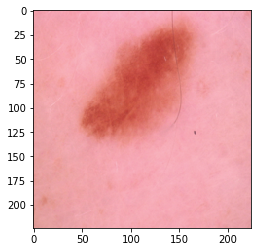

In [5]:
random_image_index = random.randrange(6522)
plt.imshow(X_train[random_image_index])
plt.show()

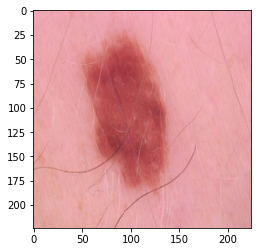

In [6]:
random_image_index = random.randrange(1812)
plt.imshow(X_test[random_image_index])
plt.show()

## Data Normalisation ##

*The below divison of each element / number will normalise the whole dataset as it would consider 255 as 1 and each number would be between 0 to 1 because it's divide by 255 and lies between range of 0 and 255.*

In [59]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_valid = X_valid.astype("float32")

X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_valid_norm = X_valid / 255

## One Hot encoding

In [60]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat =  keras.utils.to_categorical(y_test)
y_valid_cat = keras.utils.to_categorical(y_valid)

In [61]:
y_train_cat

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

## Image Augmentation Generator.##

1.   Rotation of image with 60 dgree angle
2.   Horizontal Flip
3.   Verticle Flip



In [62]:
data_generator = ImageDataGenerator(rotation_range= 60, 
                                        horizontal_flip = True,
                                        vertical_flip = True, 
                                        validation_split= 0.2
                                    )

### Model Performance for different Optimiser

*CNN Models are trained to experiment which of the following optimisers are best suited under constant learning rate of 0.01 and 20 epochs. Following are some of the optimisers listed below to test the performance of model in terms of model accuracy and loss over 200 epochs.*

#### Keras Optimisers.

1.   RMSProp Optimiser.
2.   SGD Optimiser.
3.   Adam Optimiser.

### RMSProp Optimiser

In [33]:
cnn_model_rms = Sequential()
cnn_model_rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model_rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model_rms.add(MaxPooling2D(2, 2))
cnn_model_rms.add(Dropout(0.4))

cnn_model_rms.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_rms.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_rms.add(MaxPooling2D(2, 2))
cnn_model_rms.add(Dropout(0.25))

cnn_model_rms.add(Flatten())
# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model_rms.add(Dense(units = 512, activation = 'relu')) 
cnn_model_rms.add(Dense(units = 1024, activation = 'relu')) 
cnn_model_rms.add(Dense(units = 512, activation = 'relu')) 
cnn_model_rms.add(Dense(units = 5, activation= 'softmax' ))
cnn_model_rms.compile(loss=keras.losses.categorical_crossentropy, optimizer= RMSprop(lr=0.001), metrics= ['accuracy'])

In [34]:
    history1_rms_prop = cnn_model_rms.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=30, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

Epoch 1/30
204/204 [==============================] - 69s 338ms/step - loss: 4.1380 - acc: 0.7405 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 2/30
204/204 [==============================] - 61s 298ms/step - loss: 4.1520 - acc: 0.7424 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 3/30
204/204 [==============================] - 61s 300ms/step - loss: 4.1520 - acc: 0.7424 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 4/30
204/204 [==============================] - 61s 300ms/step - loss: 4.1526 - acc: 0.7424 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 5/30
204/204 [==============================] - 61s 298ms/step - loss: 4.1509 - acc: 0.7425 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 6/30
204/204 [==============================] - 61s 300ms/step - loss: 4.1520 - acc: 0.7424 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 7/30
204/204 [==============================] - 61s 300ms/step - loss: 4.1520 - acc: 0.7424 - val_loss: 4.0240 - val_acc: 0.7503
Epoch 8/30
204/204 [==============================] - 6

In [35]:
accuracy_rmsprop = history1_rms_prop.history["acc"]
loss_rmsprop = history1_rms_prop.history["loss"]
epochs_rmsprop = len(loss_rmsprop)

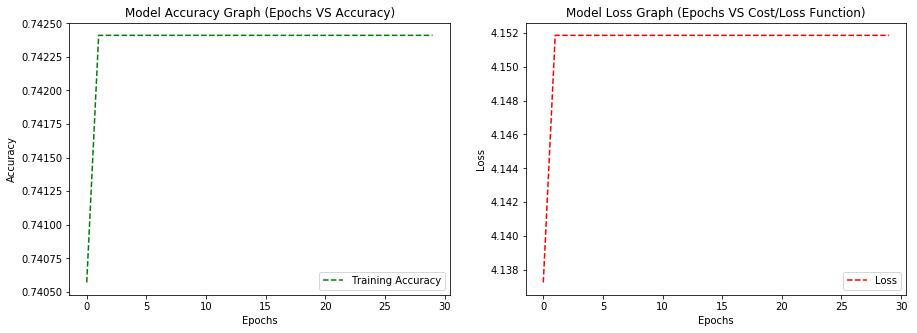

In [36]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(range(epochs_rmsprop), accuracy_rmsprop, "g--", label="Training Accuracy")
axes[0].set_title('Model Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Epochs")
axes[1].plot(range(epochs_rmsprop), loss_rmsprop, "r--", label="Loss")
axes[1].set_title('Model Loss Graph (Epochs VS Cost/Loss Function)')
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epochs")
axes[0].legend()
axes[1].legend()
plt.show()

#### Saving Accuracy and Loss Over Epochs Results to Pickle  File.

In [37]:
with open("rms_prop.pkl", "wb") as file:
    pickle.dump({
        "history": history1_rms_prop.history,
    }, file)

In [38]:
cnn_model_rms.save('30_rms.h5')
sendEmail("sareenv@uni.coventry.ac.uk", "rmsprop")

## RMSProp Evaluation

In [13]:
rms_model = load_model('30_rms.h5')

In [26]:
pred = rms_model.evaluate(X_test_norm, y_test_cat)
print("Model Accuracy is {} %".format(pred[1] *100))

1812/1812 [==============================] - 3s 1ms/step
Model Accuracy is 72.79249446807844 %


### SGD Optimiser

In [ ]:
cnn_model_sgd = Sequential()
cnn_model_sgd.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model_sgd.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model_sgd.add(MaxPooling2D(2, 2))
cnn_model_sgd.add(Dropout(0.4))

cnn_model_sgd.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_sgd.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_sgd.add(MaxPooling2D(2, 2))
cnn_model_sgd.add(Dropout(0.25))

cnn_model_sgd.add(Flatten())
# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model_sgd.add(Dense(units = 512, activation = 'relu')) 
cnn_model_sgd.add(Dense(units = 1024, activation = 'relu')) 
cnn_model_sgd.add(Dense(units = 512, activation = 'relu')) 
cnn_model_sgd.add(Dense(units = 5, activation= 'softmax' ))

cnn_model_sgd.compile(metrics= ['accuracy'], loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(lr=0.001))

In [ ]:
history1_sdg = cnn_model_sgd.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=30, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

In [ ]:
accuracy_sgd = history1_sdg.history["acc"]
loss_sgd = history1_sdg.history["loss"]
epochs_sgd = len(accuracy_sgd)

with open("sgd.pkl", "wb") as file:
    pickle.dump({
        "history": history1_sdg.history,
    }, file)

In [ ]:
val_acc = history1_sdg.history['val_acc']

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(range(epochs_sgd), accuracy_sgd, "g--", label="Training Accuracy")
axes[0].set_title('Model Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Epochs")
axes[1].plot(range(epochs_sgd), loss_sgd, "r--", label="Loss")
axes[1].set_title('Model Loss Graph (Epochs VS Cost/Loss Function)')
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epochs")
axes[0].legend()
axes[1].legend()
plt.show()

### Saving Model and Send Email

In [ ]:
cnn_model_sgd.save('30_sgd.h5')
sendEmail("sareenv@uni.coventry.ac.uk", "sgd")

## SGD Evaluation

In [15]:
from tensorflow.keras.models import load_model
sgd_model = load_model('30_sgd.h5')

In [20]:
results = sgd_model.evaluate(X_test_norm, y_test_cat)
print("Output Predections are {} %".format(results[1] * 100))

1812/1812 [==============================] - 3s 2ms/step
Output Predections are 75.05518765112686 %


## ADAM Optimiser

In [ ]:
cnn_model_adam = Sequential()
cnn_model_adam.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model_adam.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model_adam.add(MaxPooling2D(2, 2))
cnn_model_adam.add(Dropout(0.4))

cnn_model_adam.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_adam.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model_adam.add(MaxPooling2D(2, 2))
cnn_model_adam.add(Dropout(0.25))

cnn_model_adam.add(Flatten())
# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model_adam.add(Dense(units = 512, activation = 'relu')) 
cnn_model_adam.add(Dense(units = 1024, activation = 'relu')) 
cnn_model_adam.add(Dense(units = 512, activation = 'relu')) 

cnn_model_adam.add(Dense(units = 5, activation= 'softmax' ))

cnn_model_adam.compile(loss ='categorical_crossentropy', optimizer= Adam(lr=0.001), metrics= ['accuracy'])

In [ ]:
history1_adam = cnn_model_adam.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=30, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

In [ ]:
accuracy_adam = history1_adam.history["acc"]
loss_adam= history1_adam.history["loss"]
epochs_adam = range(len(loss_adam))

with open("adam.pkl", "wb") as file:
    pickle.dump({
        "history": history1_adam.history,
    }, file)

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(epochs_adam, accuracy_adam, "g", label="Training Accuracy")
axes[0].set_title('Model Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Epochs")
axes[1].plot(epochs_adam, loss_adam, "r", label="Loss")
axes[1].set_title('Model Loss Graph (Epochs VS Cost/Loss Function)')
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epochs")
axes[0].legend()
axes[1].legend()
plt.show()

In [ ]:
cnn_model_adam.save('30_adam.h5')
sendEmail("sareenv@uni.coventry.ac.uk", "adam")

## Adam Evaluation

In [27]:
adam_model = load_model('30_adam.h5')

In [30]:
result = adam_model.evaluate(X_test_norm, y_test_cat)
print("Model accuracy is {} %".format(result[1] * 100))

1812/1812 [==============================] - 3s 1ms/step
Model accuracy is 72.79249446807844 %


## Optimiser Results Visualisation ##

In [5]:
adam_History = None 
with open('./optimsers_history/adam.pkl', 'rb') as file:
    adam_History = pickle.load(file)


sgd_History = None 
with open('./optimsers_history/sgd.pkl', 'rb') as file:
    sgd_History = pickle.load(file)
    
rmsProp_history = None 
with open('./optimsers_history/rms_prop.pkl', 'rb') as file:
    rmsProp_history = pickle.load(file)


adam_history = adam_History['history']
sgd_history = sgd_History['history']
rms_history = rmsProp_history['history']

In [6]:
accuracy_sgd = sgd_history['acc']
epochs_sgd = range(len(accuracy_sgd))
loss_sgd = sgd_history['loss']

accuracy_rms = rms_history['acc']
epochs_rms = range(len(accuracy_rms))
loss_rms = rms_history['loss']

accuracy_adam = adam_history['acc']
epochs_adam = range(len(accuracy_adam))
loss_adam = adam_history['loss']



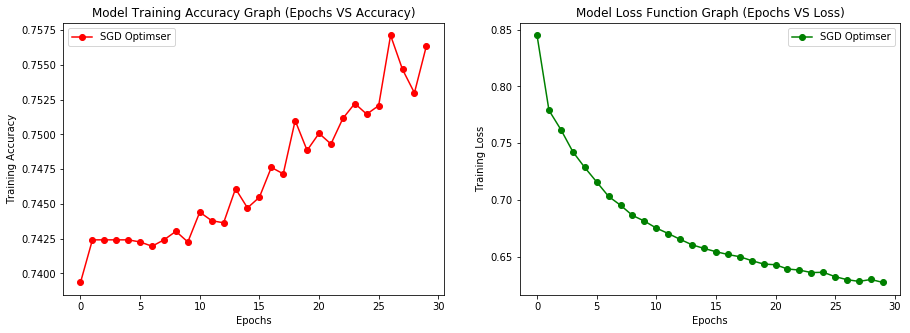

In [8]:
# plt.plot(epochs_rmsprop, accuracy_rmsprop, label="RMSProp")
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(epochs_sgd, accuracy_sgd, 'r-o', label="SGD Optimser")
axes[0].set_title('Model Training Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Accuracy")
axes[0].legend()

axes[1].plot(epochs_sgd, loss_sgd, 'g-o', label="SGD Optimser")
axes[1].set_title('Model Loss Function Graph (Epochs VS Loss)')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Training Loss") 
axes[1].legend()

axes[1].legend()
plt.show()

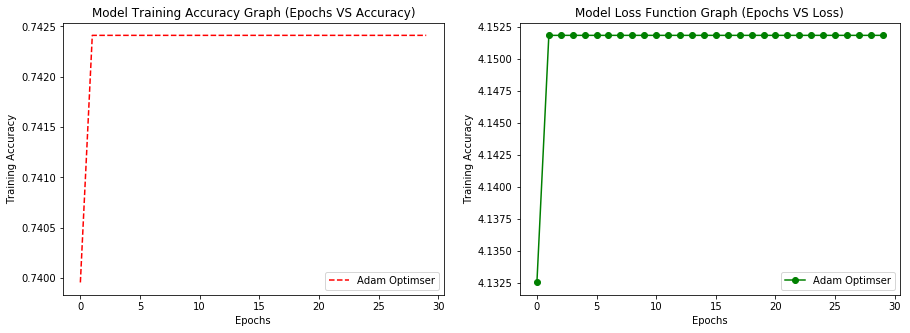

In [41]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(epochs_adam, accuracy_adam, 'r--', label="Adam Optimser")
axes[0].set_title('Model Training Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Accuracy")
axes[0].legend()

axes[1].plot(epochs_adam, loss_adam, 'g--', label="Adam Optimser")
axes[1].set_title('Model Loss Function Graph (Epochs VS Loss)')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Training Accuracy") 
axes[1].legend()
plt.show()

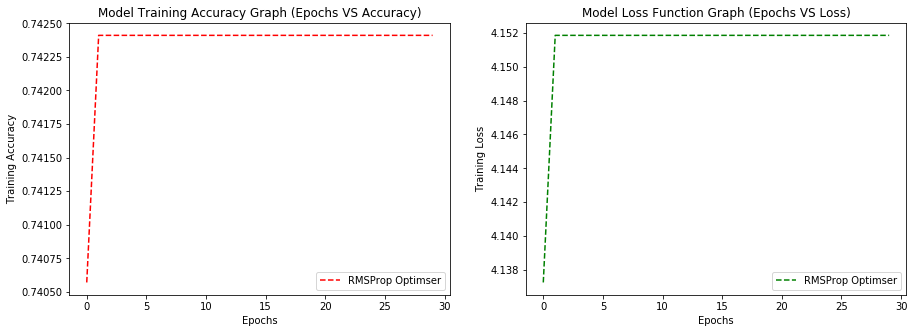

In [10]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(epochs_rms, accuracy_rms, 'r--', label="RMSProp Optimser")
axes[0].set_title('Model Training Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Accuracy")
axes[0].legend()

axes[1].plot(epochs_rms, loss_rms, 'g--', label="RMSProp Optimser")
axes[1].set_title('Model Loss Function Graph (Epochs VS Loss)')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Training Loss") 
axes[1].legend()
plt.show()

## Image Segmentation. 

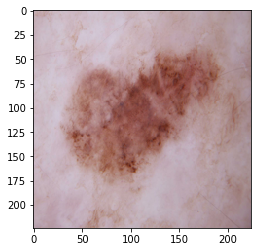

In [39]:
# code for image Segmentation
X_train_sample = X_train_norm[5]
plt.imshow(X_train_sample)
plt.show()

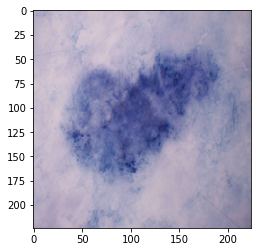

In [40]:
gray = cv.cvtColor(X_train_sample, cv.COLOR_BGR2RGB)
plt.imshow(gray)
plt.show()

The shape is (224, 224, 3)


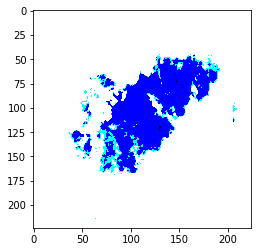

In [41]:
r, b_seg = cv.threshold(gray, 0.4, 1, cv.THRESH_BINARY)
plt.imshow(b_seg)
print("The shape is {}".format(b_seg.shape))
plt.show()

*Project Directory contains a jupyter notebook called Image Segmentation which performs a similar segmentation technique to all the image in X_train, X_test and X_valid*  

### Importing Segmentation Data.

In [49]:
segmentationData = None 
with open('./SegmentationData/ValidationData/segmentation.pkl', 'rb') as file:
    segmentationData = pickle.load(file)

In [50]:
X_test_seg = segmentationData['X_test']
X_training_seg = segmentationData['X_train']
X_valid_seg = segmentationData['X_valid']

In [10]:
X_training_seg.shape

(6522, 224, 224, 3)

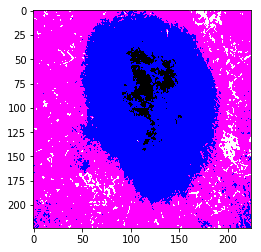

In [11]:
plt.imshow(X_test_seg[200])
plt.show()

## Segmented Images Normalisation

In [51]:
X_test_seg_norm = X_test_seg.astype('float32')
X_training_seg_norm = X_training_seg.astype('float32')
X_valid_seg_norm = X_valid_seg.astype('float32')

X_test_seg_norm = X_test_seg_norm / 255 
X_training_seg_norm = X_training_seg_norm / 255 
X_valid_seg_norm = X_valid_seg_norm / 255

### Model Training on segmented Image with SGD optimser and LR = 0.01

In [53]:
cnn_segmentedmodel_sgd = Sequential()
cnn_segmentedmodel_sgd.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_segmentedmodel_sgd.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_segmentedmodel_sgd.add(MaxPooling2D(2, 2))
cnn_segmentedmodel_sgd.add(Dropout(0.4))

cnn_segmentedmodel_sgd.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_segmentedmodel_sgd.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_segmentedmodel_sgd.add(MaxPooling2D(2, 2))
cnn_segmentedmodel_sgd.add(Dropout(0.25))

cnn_segmentedmodel_sgd.add(Flatten())
# Now this needs to be passed to the fully connected artifical neural networks.

cnn_segmentedmodel_sgd.add(Dense(units = 512, activation = 'relu')) 
cnn_segmentedmodel_sgd.add(Dense(units = 1024, activation = 'relu')) 
cnn_segmentedmodel_sgd.add(Dense(units = 512, activation = 'relu')) 
cnn_segmentedmodel_sgd.add(Dense(units = 5, activation= 'softmax' ))

cnn_segmentedmodel_sgd.compile(metrics= ['accuracy'], loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(lr=0.01))

In [54]:
history1_seg_sdg = cnn_segmentedmodel_sgd.fit(X_training_seg_norm, y_train_cat, epochs=30, validation_data=(X_valid_seg_norm, y_valid_cat))

Train on 6522 samples, validate on 725 samples
Epoch 1/30
6522/6522 [==============================] - 34s 5ms/step - loss: 0.8374 - acc: 0.7406 - val_loss: 1.1817 - val_acc: 0.7462
Epoch 2/30
6522/6522 [==============================] - 30s 5ms/step - loss: 0.8139 - acc: 0.7429 - val_loss: 0.9724 - val_acc: 0.7462
Epoch 3/30
6522/6522 [==============================] - 30s 5ms/step - loss: 0.8117 - acc: 0.7429 - val_loss: 1.0464 - val_acc: 0.7462
Epoch 4/30
6522/6522 [==============================] - 31s 5ms/step - loss: 0.8070 - acc: 0.7429 - val_loss: 0.9375 - val_acc: 0.7462
Epoch 5/30
6522/6522 [==============================] - 30s 5ms/step - loss: 0.8083 - acc: 0.7429 - val_loss: 1.0829 - val_acc: 0.7462
Epoch 6/30
6522/6522 [==============================] - 30s 5ms/step - loss: 0.8059 - acc: 0.7429 - val_loss: 1.0209 - val_acc: 0.7462
Epoch 7/30
6522/6522 [==============================] - 30s 5ms/step - loss: 0.8031 - acc: 0.7429 - val_loss: 1.0327 - val_acc: 0.7462
Epoch 8/

In [55]:
with open('segmentation_30sgd.pkl', 'wb') as file:
    data = {
        'history': history1_seg_sdg.history,
    }
    pickle.dump(data, file)
cnn_segmentedmodel_sgd.save('cnn_segmented_sgd.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'sgd_hisroty')

In [56]:
accuracy = history1_seg_sdg.history['acc']
val_accuracy = history1_seg_sdg.history['val_acc']
loss = history1_seg_sdg.history['loss']
epochs = range(len(loss))

In [68]:
evaluation = cnn_segmentedmodel_sgd.evaluate(X_test_norm, y_test_cat)
print("Accuracy is {}".format(evaluation[1]))


1812/1812 [==============================] - 3s 2ms/step
Accuracy is 0.7279249446807845


### Accuracy and Loss Function with Epochs Visualisation

In [58]:
seg_val_history = None
with open("./SegmentedHistory/segmentation_30epochsSgd_val.pkl", "rb") as file:
    seg_val_history = pickle.load(file)['history']

In [59]:
seg_acc = np.array(seg_val_history['acc']) * 100
seg_val_acc = np.array(seg_val_history['val_acc']) * 100
seg_loss = np.array(seg_val_history['loss']) * 100
seg_val_loss = np.array(seg_val_history['val_loss']) * 100

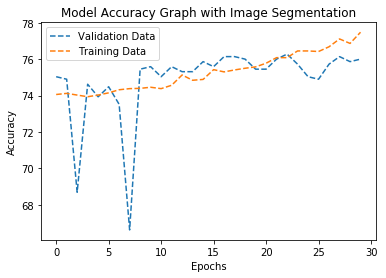

In [35]:
plt.plot(range(30), seg_val_acc, '--', label= "Validation Data")
plt.plot(range(30), seg_acc, '--', label= "Training Data")
plt.title("Model Accuracy Graph with Image Segmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

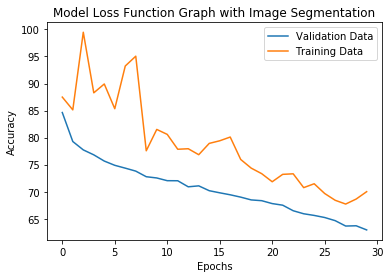

In [69]:
plt.plot(range(30), seg_loss, '-', label= "Validation Data")
plt.plot(range(30), seg_val_loss, '-', label= "Training Data")
plt.title("Model Loss Function Graph with Image Segmentation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Model Evaluation trained with Segmented Images

In [13]:
segmented_model1 = load_model('cnn_segmented_sgd.h5')

In [16]:
result = segmented_model1.evaluate(X_test_norm, y_test_cat)
print("Model accuracy is {} %".format(result[1] * 100))

1812/1812 [==============================] - 3s 2ms/step
Model accuracy is 72.79249446807844 %


## Hyper-Parameter Changes.

* Increase in hidden layers.
* Differance in Number of epochs
* Variation in Learning Rates. 

In [13]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [14]:
h1_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=30, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

Epoch 1/30
204/204 [==============================] - 64s 312ms/step - loss: 1.0050 - acc: 0.7349 - val_loss: 1.0895 - val_acc: 0.7503
Epoch 2/30
204/204 [==============================] - 61s 301ms/step - loss: 0.8007 - acc: 0.7424 - val_loss: 1.0224 - val_acc: 0.7503
Epoch 3/30
204/204 [==============================] - 62s 302ms/step - loss: 0.7919 - acc: 0.7425 - val_loss: 1.0112 - val_acc: 0.7503
Epoch 4/30
204/204 [==============================] - 61s 301ms/step - loss: 0.7868 - acc: 0.7424 - val_loss: 0.9856 - val_acc: 0.7503
Epoch 5/30
204/204 [==============================] - 62s 302ms/step - loss: 0.7806 - acc: 0.7425 - val_loss: 1.0097 - val_acc: 0.7503
Epoch 6/30
204/204 [==============================] - 62s 305ms/step - loss: 0.7764 - acc: 0.7424 - val_loss: 0.9825 - val_acc: 0.7503
Epoch 7/30
204/204 [==============================] - 57s 281ms/step - loss: 0.7724 - acc: 0.7423 - val_loss: 1.0241 - val_acc: 0.7503
Epoch 8/30
204/204 [==============================] - 6

In [15]:
with open("hyper_test1.pkl", "wb") as file:
    pickle.dump({
        'history': h1_history.history
    }, file)
cnn_model.save('30_hyper-parameters.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'hyper-parameter_test1')

## Model Evaluation 

In [16]:
model = load_model('30_hyper-parameters.h5')
result = model.evaluate(X_test_norm, y_test_cat)
print("Mode accuracy is {} %".format(result[1] * 100))

1812/1812 [==============================] - 4s 2ms/step
Mode accuracy is 59.105960278058426 %


## Model Training Without Validation Data

In [76]:
wtraining = None 
wtesting = None 
with open("./NVSplit/train.pkl", "rb") as file:
    wtraining = pickle.load(file)
    
with open("./NVSplit/test.pkl", "rb") as file:
    wtesting = pickle.load(file)

In [77]:
X_train_w = wtraining['imagesData']
y_train_w = wtraining['labels']
X_test_w = wtesting['imagesData']
y_test_w = wtesting['imageLabels']

In [78]:
X_test_w_norm = X_test_w / 255 
X_train_w_norm = X_train_w / 255
y_train_w_cat = keras.utils.to_categorical(y_train_w)
y_test_w_cat = keras.utils.to_categorical(y_test_w)

In [79]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [ ]:
h2_history = cnn_model.fit_generator(data_generator.flow(X_train_w_norm, y_train_w_cat, batch_size=32),
                                                    epochs=30, shuffle=True)

In [ ]:
with open("hyper_test2.pkl", "wb") as file:
    pickle.dump({
        'history': h2_history.history
    }, file)
cnn_model.save('30_hyper-parameters2.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'hyper-parameter_test2')

## Model Evaluation 

In [11]:
model_h2 = load_model('30_hyper-parameters2.h5')

In [12]:
result = model_h2.evaluate(X_test_norm, y_test_cat)
print("Model Accuracy is {} %".format(result[1] * 100))

1812/1812 [==============================] - 5s 3ms/step
Model Accuracy is 70.64017658728375 %


# Hyper-Parameter Model 2 Test 2.

In [60]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [ ]:
h22_history = cnn_model.fit_generator(data_generator.flow(X_train_w_norm, y_train_w_cat, batch_size=32),
                                                    epochs=300, shuffle=True)

In [ ]:
with open("300hyper_test22.pkl", "wb") as file:
    pickle.dump({
        'history': h22_history.history
    }, file)
cnn_model.save('300_hyper-parameters22.h5')


In [ ]:
results = cnn_model.evaluate(X_test_w_norm, y_test_w_cat)
print("Model predection is {} %".format(results[1] * 100))

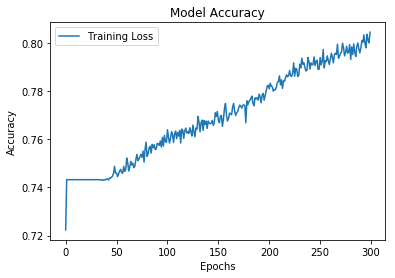

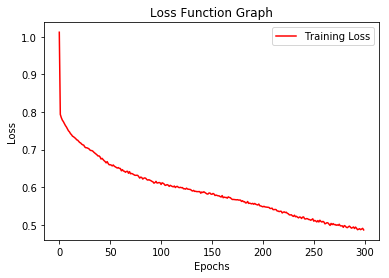

In [34]:
his = h22_history.history 
acc = his['acc']
loss = his['loss']
plt.plot(range(300), acc, label="Training Loss")
plt.xlabel("Epochs")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(range(300), loss, 'r-', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Graph")
plt.legend()
plt.show()

## HyperParameter Model 1 Test 2 

In [8]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [9]:
h12_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=140, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

Epoch 1/140
204/204 [==============================] - 66s 326ms/step - loss: 0.9901 - acc: 0.7169 - val_loss: 1.0784 - val_acc: 0.7503
Epoch 2/140
204/204 [==============================] - 60s 296ms/step - loss: 0.7987 - acc: 0.7423 - val_loss: 1.0682 - val_acc: 0.7503
Epoch 3/140
204/204 [==============================] - 56s 275ms/step - loss: 0.7916 - acc: 0.7424 - val_loss: 1.0371 - val_acc: 0.7503
Epoch 4/140
204/204 [==============================] - 60s 296ms/step - loss: 0.7872 - acc: 0.7424 - val_loss: 1.0047 - val_acc: 0.7503
Epoch 5/140
204/204 [==============================] - 60s 295ms/step - loss: 0.7808 - acc: 0.7424 - val_loss: 0.9961 - val_acc: 0.7503
Epoch 6/140
204/204 [==============================] - 59s 289ms/step - loss: 0.7785 - acc: 0.7424 - val_loss: 0.9782 - val_acc: 0.7503
Epoch 7/140
204/204 [==============================] - 60s 295ms/step - loss: 0.7744 - acc: 0.7425 - val_loss: 0.9888 - val_acc: 0.7503
Epoch 8/140
204/204 [===========================

Epoch 61/140
204/204 [==============================] - 61s 299ms/step - loss: 0.6438 - acc: 0.7471 - val_loss: 0.8472 - val_acc: 0.6331
Epoch 62/140
204/204 [==============================] - 61s 297ms/step - loss: 0.6431 - acc: 0.7484 - val_loss: 1.0542 - val_acc: 0.4717
Epoch 63/140
204/204 [==============================] - 59s 290ms/step - loss: 0.6450 - acc: 0.7489 - val_loss: 0.9629 - val_acc: 0.5959
Epoch 64/140
204/204 [==============================] - 61s 298ms/step - loss: 0.6419 - acc: 0.7502 - val_loss: 1.0726 - val_acc: 0.5241
Epoch 65/140
204/204 [==============================] - 61s 299ms/step - loss: 0.6448 - acc: 0.7486 - val_loss: 0.9167 - val_acc: 0.5503
Epoch 66/140
204/204 [==============================] - 61s 299ms/step - loss: 0.6466 - acc: 0.7441 - val_loss: 0.9329 - val_acc: 0.5559
Epoch 67/140
204/204 [==============================] - 61s 299ms/step - loss: 0.6394 - acc: 0.7500 - val_loss: 0.9290 - val_acc: 0.6041
Epoch 68/140
204/204 [===================

In [13]:
with open("history_h12.pkl", "wb") as file:
    data = {
        'history': h12_history.history
    }
    pickle.dump(data, file)
cnn_model.save('h12_test.h5')

In [14]:
res = cnn_model.evaluate(X_test_norm, y_test_cat)
print(res[1] * 100)

1812/1812 [==============================] - 3s 2ms/step
68.81898453430361


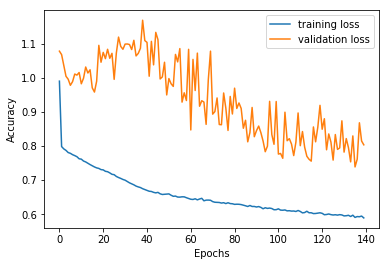

In [35]:
loss_h12 = h12['loss']
loss_val_h12 = h12['val_loss']
plt.plot(range(140), loss_h12, label = 'training loss')
plt.plot(range(140), loss_val_h12, label = 'validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Hyper-model 1 test 3 

In [36]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [37]:
h13_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=300, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )

Epoch 1/300
204/204 [==============================] - 63s 308ms/step - loss: 1.0431 - acc: 0.7224 - val_loss: 1.0774 - val_acc: 0.7503
Epoch 2/300
204/204 [==============================] - 56s 276ms/step - loss: 0.8004 - acc: 0.7424 - val_loss: 1.0026 - val_acc: 0.7503
Epoch 3/300
204/204 [==============================] - 61s 299ms/step - loss: 0.7899 - acc: 0.7424 - val_loss: 0.9918 - val_acc: 0.7503
Epoch 4/300
204/204 [==============================] - 61s 301ms/step - loss: 0.7834 - acc: 0.7424 - val_loss: 1.0296 - val_acc: 0.7503
Epoch 5/300
204/204 [==============================] - 61s 300ms/step - loss: 0.7799 - acc: 0.7424 - val_loss: 0.9782 - val_acc: 0.7503
Epoch 6/300
204/204 [==============================] - 61s 300ms/step - loss: 0.7737 - acc: 0.7425 - val_loss: 0.9919 - val_acc: 0.7503
Epoch 7/300
204/204 [==============================] - 61s 298ms/step - loss: 0.7695 - acc: 0.7425 - val_loss: 0.9812 - val_acc: 0.7503
Epoch 8/300
204/204 [===========================

Epoch 61/300
204/204 [==============================] - 60s 295ms/step - loss: 0.6406 - acc: 0.7463 - val_loss: 1.0258 - val_acc: 0.5062
Epoch 62/300
204/204 [==============================] - 61s 300ms/step - loss: 0.6417 - acc: 0.7484 - val_loss: 0.9665 - val_acc: 0.5241
Epoch 63/300
204/204 [==============================] - 61s 301ms/step - loss: 0.6397 - acc: 0.7488 - val_loss: 1.0340 - val_acc: 0.4966
Epoch 64/300
204/204 [==============================] - 61s 300ms/step - loss: 0.6389 - acc: 0.7479 - val_loss: 0.9846 - val_acc: 0.5214
Epoch 65/300
204/204 [==============================] - 62s 303ms/step - loss: 0.6383 - acc: 0.7484 - val_loss: 0.9237 - val_acc: 0.5697
Epoch 66/300
204/204 [==============================] - 61s 301ms/step - loss: 0.6353 - acc: 0.7494 - val_loss: 1.0041 - val_acc: 0.5352
Epoch 67/300
204/204 [==============================] - 61s 300ms/step - loss: 0.6350 - acc: 0.7510 - val_loss: 0.9719 - val_acc: 0.5517
Epoch 68/300
204/204 [===================

204/204 [==============================] - 60s 296ms/step - loss: 0.5569 - acc: 0.7813 - val_loss: 0.7642 - val_acc: 0.6883
Epoch 180/300
204/204 [==============================] - 60s 296ms/step - loss: 0.5568 - acc: 0.7741 - val_loss: 0.6831 - val_acc: 0.7117
Epoch 181/300
204/204 [==============================] - 57s 280ms/step - loss: 0.5530 - acc: 0.7767 - val_loss: 0.7632 - val_acc: 0.6814
Epoch 182/300
204/204 [==============================] - 60s 296ms/step - loss: 0.5550 - acc: 0.7764 - val_loss: 0.6986 - val_acc: 0.7297
Epoch 183/300
204/204 [==============================] - 60s 296ms/step - loss: 0.5562 - acc: 0.7775 - val_loss: 0.7140 - val_acc: 0.7172
Epoch 184/300
204/204 [==============================] - 60s 296ms/step - loss: 0.5494 - acc: 0.7723 - val_loss: 0.6880 - val_acc: 0.7228
Epoch 185/300
204/204 [==============================] - 60s 296ms/step - loss: 0.5503 - acc: 0.7743 - val_loss: 0.7559 - val_acc: 0.6897
Epoch 186/300
204/204 [=========================

204/204 [==============================] - 61s 298ms/step - loss: 0.4947 - acc: 0.7986 - val_loss: 0.5841 - val_acc: 0.7683
Epoch 298/300
204/204 [==============================] - 61s 298ms/step - loss: 0.4897 - acc: 0.7975 - val_loss: 0.5995 - val_acc: 0.7614
Epoch 299/300
204/204 [==============================] - 61s 299ms/step - loss: 0.4888 - acc: 0.7982 - val_loss: 0.5937 - val_acc: 0.7490
Epoch 300/300
204/204 [==============================] - 61s 298ms/step - loss: 0.4900 - acc: 0.7977 - val_loss: 0.5895 - val_acc: 0.7614


In [38]:
with open("history_h13.pkl", "wb") as file:
    data = {
        'history': h13_history.history
    }
    pickle.dump(data, file)
cnn_model.save('h13_test.h5')

In [24]:
history = None 
with open('./history_h13.pkl', 'rb') as file:
    history = pickle.load(file)['history']


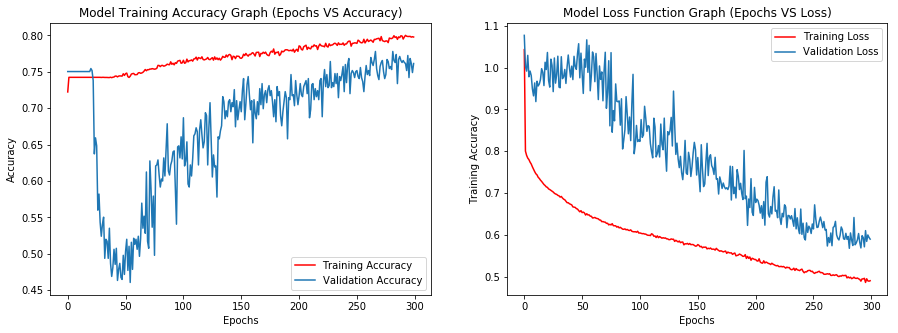

In [27]:
acc = history['acc']
loss = history['loss']
val_loss = history['val_loss']
val_acc = history['val_acc']

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axes[0].plot(range(300), acc, 'r-', label = 'Training Accuracy')
axes[0].plot(range(300), val_acc, '-', label = 'Validation Accuracy')
axes[0].set_title('Model Training Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].plot(range(300), loss, 'r-', label = 'Training Loss')
axes[1].plot(range(300), val_loss, '-', label = 'Validation Loss')
axes[1].set_title('Model Loss Function Graph (Epochs VS Loss)')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Training Accuracy") 
axes[1].legend()

plt.show()

In [57]:
res = cnn_model.evaluate(X_test_norm, y_test_cat)
print("Model accuracy is {} %".format(res[1] * 100))

1812/1812 [==============================] - 3s 2ms/step
Model accuracy is 77.48344369545151 %


## Model Accuracy Visualisation.

In [ ]:
hyper1_history = None
with open("./hyper_test1.pkl", "rb") as file:
    hyper1_history = pickle.load(file)['history']

hyper12_history = None
with open("./history_h12.pkl", "rb") as file:
    hyper12_history = pickle.load(file)['history']
    
hyper2_history = None
with open("./hyper_test2.pkl", "rb") as file:
    hyper2_history = pickle.load(file)['history']

hyper13_history = None 
with open("./history_h13.pkl", "rb") as file:
    hyper13_history = pickle.load(file)['history']


In [ ]:
# again
hyper_acc = np.array(hyper1_history['acc']) * 100
hyper2_acc = np.array(hyper2_history['acc']) * 100
plt.title('Model training with and without validation data')
plt.plot(range(30), hyper_acc, 'g-', label = "with validation 30 epochs")
plt.plot(range(30), hyper2_acc, 'b-', label = "without validation 30 epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# again
hyper_loss = hyper1_history['loss']
hyper2_loss = hyper2_history['loss']
plt.plot(range(30), hyper_loss, 'b-', label = "with validation ")
plt.plot(range(30), hyper2_loss, 'g-', label = "without validation ")
plt.title('Model training with and without validation data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

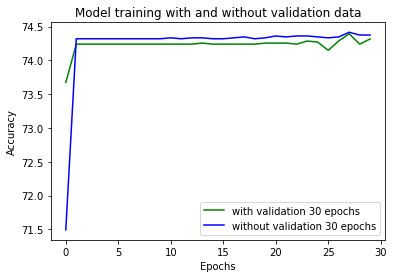

In [40]:
hyper_acc = np.array(hyper1_history['acc']) * 100
hyper2_acc = np.array(hyper2_history['acc']) * 100
plt.title('Model training with and without validation data')
plt.plot(range(30), hyper_acc, 'g-', label = "with validation 30 epochs")
plt.plot(range(30), hyper2_acc, 'b-', label = "without validation 30 epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

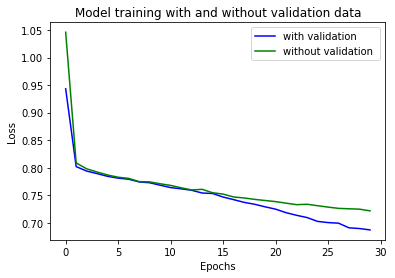

In [18]:
hyper_loss = hyper1_history['loss']
hyper2_loss = hyper2_history['loss']
plt.plot(range(30), hyper_loss, 'b-', label = "with validation ")
plt.plot(range(30), hyper2_loss, 'g-', label = "without validation ")
plt.title('Model training with and without validation data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

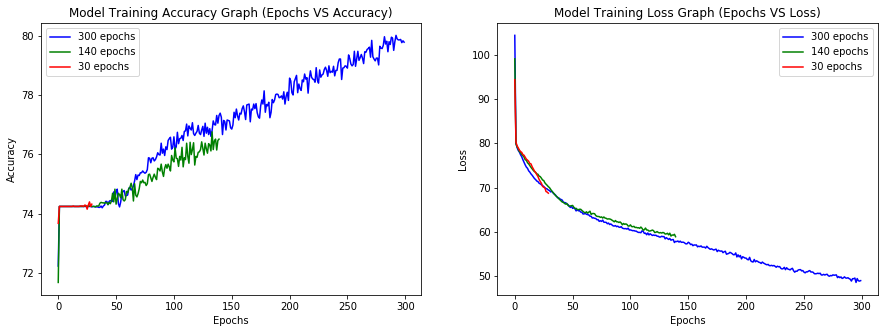

In [41]:
hyper_acc = np.array(hyper1_history['acc']) * 100
hyper13_acc = np.array(hyper13_history['acc']) * 100
hyper12_acc = np.array(hyper12_history['acc']) * 100

hyper_loss = np.array(hyper1_history['loss']) * 100
hyper13_loss = np.array(hyper13_history['loss']) * 100
hyper12_loss = np.array(hyper12_history['loss']) * 100


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].plot(range(300), hyper13_acc, 'b-', label = "300 epochs")
axes[0].plot(range(140), hyper12_acc, 'g-', label = "140 epochs")
axes[0].plot(range(30), hyper_acc, 'r-', label = "30 epochs")
axes[0].set_title('Model Training Accuracy Graph (Epochs VS Accuracy)')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

axes[1].plot(range(300), hyper13_loss, 'b-', label = "300 epochs")
axes[1].plot(range(140), hyper12_loss, 'g-', label = "140 epochs")
axes[1].plot(range(30), hyper_loss, 'r-', label = "30 epochs")
axes[1].set_title('Model Training Loss Graph (Epochs VS Loss)')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.legend()
plt.show()

## Learning Rates.

1.   LR = 0.1
2.   LR = 0.01
3.   LR = 0.001
4.   LR = 0.0001
5.   LR = 0.00001


In [20]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [21]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.1), metrics= ['accuracy'])
startTime = time.time()
h1_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=150, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )
endTime = time.time() - startTime
endTime

Epoch 1/150
204/204 [==============================] - 57s 279ms/step - loss: 0.8527 - acc: 0.7346 - val_loss: 0.7837 - val_acc: 0.7503
Epoch 2/150
204/204 [==============================] - 61s 298ms/step - loss: 0.8071 - acc: 0.7424 - val_loss: 0.7751 - val_acc: 0.7503
Epoch 3/150
204/204 [==============================] - 55s 270ms/step - loss: 0.8014 - acc: 0.7424 - val_loss: 0.7832 - val_acc: 0.7503
Epoch 4/150
204/204 [==============================] - 61s 298ms/step - loss: 0.8053 - acc: 0.7424 - val_loss: 0.7732 - val_acc: 0.7503
Epoch 5/150
204/204 [==============================] - 56s 272ms/step - loss: 0.8016 - acc: 0.7411 - val_loss: 0.7877 - val_acc: 0.7503
Epoch 6/150
204/204 [==============================] - 61s 299ms/step - loss: 0.8126 - acc: 0.7388 - val_loss: 0.7954 - val_acc: 0.7503
Epoch 7/150
204/204 [==============================] - 56s 275ms/step - loss: 0.7968 - acc: 0.7424 - val_loss: 0.7769 - val_acc: 0.7503
Epoch 8/150
204/204 [===========================

Epoch 61/150
204/204 [==============================] - 62s 305ms/step - loss: 0.4944 - acc: 0.8017 - val_loss: 0.6504 - val_acc: 0.7021
Epoch 62/150
204/204 [==============================] - 59s 287ms/step - loss: 0.4830 - acc: 0.8073 - val_loss: 0.7417 - val_acc: 0.7448
Epoch 63/150
204/204 [==============================] - 61s 301ms/step - loss: 0.4902 - acc: 0.8033 - val_loss: 1.0080 - val_acc: 0.7559
Epoch 64/150
204/204 [==============================] - 61s 301ms/step - loss: 0.4792 - acc: 0.8098 - val_loss: 0.9900 - val_acc: 0.7683
Epoch 65/150
204/204 [==============================] - 61s 301ms/step - loss: 0.4849 - acc: 0.8081 - val_loss: 0.8611 - val_acc: 0.7655
Epoch 66/150
204/204 [==============================] - 57s 278ms/step - loss: 0.4735 - acc: 0.8114 - val_loss: 1.6398 - val_acc: 0.7545
Epoch 67/150
204/204 [==============================] - 61s 300ms/step - loss: 0.4875 - acc: 0.8071 - val_loss: 0.8856 - val_acc: 0.7641
Epoch 68/150
204/204 [===================

9075.275018692017

In [22]:
with open('hlr1.pkl', 'wb') as file:
    data = {'history': h1_history.history}
    pickle.dump(data, file)
cnn_model.save('hlr1.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'lr=0.1')

In [23]:
modelhlr1 = load_model('hlr1.h5')
evaluation = modelhlr1.evaluate(X_test_norm, y_test_cat)
print("Model accuracy on testing data is {} %".format(evaluation[1]))

1812/1812 [==============================] - 4s 2ms/step
Model accuracy on testing data is 0.7339955848573849 %


In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [25]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.01), metrics= ['accuracy'])
startTime = time.time()
h2_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=150, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )
endTime = time.time() - startTime
endTime

Epoch 1/150
204/204 [==============================] - 62s 305ms/step - loss: 0.8279 - acc: 0.7402 - val_loss: 0.9786 - val_acc: 0.7503
Epoch 2/150
204/204 [==============================] - 61s 299ms/step - loss: 0.7752 - acc: 0.7422 - val_loss: 0.9824 - val_acc: 0.7503
Epoch 3/150
204/204 [==============================] - 61s 300ms/step - loss: 0.7444 - acc: 0.7425 - val_loss: 0.9539 - val_acc: 0.7503
Epoch 4/150
204/204 [==============================] - 62s 302ms/step - loss: 0.7245 - acc: 0.7424 - val_loss: 0.9053 - val_acc: 0.7503
Epoch 5/150
204/204 [==============================] - 61s 300ms/step - loss: 0.7152 - acc: 0.7424 - val_loss: 0.8979 - val_acc: 0.7503
Epoch 6/150
204/204 [==============================] - 61s 300ms/step - loss: 0.7141 - acc: 0.7425 - val_loss: 0.8582 - val_acc: 0.7503
Epoch 7/150
204/204 [==============================] - 56s 276ms/step - loss: 0.7040 - acc: 0.7421 - val_loss: 0.9212 - val_acc: 0.7490
Epoch 8/150
204/204 [===========================

Epoch 61/150
204/204 [==============================] - 61s 301ms/step - loss: 0.5025 - acc: 0.7962 - val_loss: 0.5800 - val_acc: 0.7586
Epoch 62/150
204/204 [==============================] - 61s 301ms/step - loss: 0.5036 - acc: 0.7940 - val_loss: 0.5780 - val_acc: 0.7710
Epoch 63/150
204/204 [==============================] - 62s 302ms/step - loss: 0.5045 - acc: 0.7954 - val_loss: 0.5922 - val_acc: 0.7683
Epoch 64/150
204/204 [==============================] - 62s 302ms/step - loss: 0.5036 - acc: 0.7934 - val_loss: 0.5546 - val_acc: 0.7862
Epoch 65/150
204/204 [==============================] - 61s 300ms/step - loss: 0.4991 - acc: 0.7985 - val_loss: 0.5772 - val_acc: 0.7683
Epoch 66/150
204/204 [==============================] - 61s 301ms/step - loss: 0.4968 - acc: 0.7983 - val_loss: 0.5744 - val_acc: 0.7724
Epoch 67/150
204/204 [==============================] - 61s 301ms/step - loss: 0.4953 - acc: 0.7973 - val_loss: 0.5775 - val_acc: 0.7683
Epoch 68/150
204/204 [===================

9172.512210130692

In [26]:
with open('hlr2.pkl', 'wb') as file:
    data = {'history': h2_history.history}
    pickle.dump(data, file)
cnn_model.save('hlr2.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'lr=0.01')

In [27]:
modelhlr2 = load_model('hlr2.h5')
evaluation = modelhlr2.evaluate(X_test_norm, y_test_cat)
print("Model accuracy on testing data is {} %".format(evaluation[1]))

1812/1812 [==============================] - 3s 2ms/step
Model accuracy on testing data is 0.8101545251231583 %


In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [29]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])
startTime = time.time()
h3_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=150, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )
endTime = time.time() - startTime
endTime

Epoch 1/150
204/204 [==============================] - 62s 303ms/step - loss: 0.9402 - acc: 0.7350 - val_loss: 1.0810 - val_acc: 0.7503
Epoch 2/150
204/204 [==============================] - 61s 300ms/step - loss: 0.7955 - acc: 0.7424 - val_loss: 1.0381 - val_acc: 0.7503
Epoch 3/150
204/204 [==============================] - 62s 304ms/step - loss: 0.7857 - acc: 0.7424 - val_loss: 1.0207 - val_acc: 0.7503
Epoch 4/150
204/204 [==============================] - 62s 302ms/step - loss: 0.7800 - acc: 0.7425 - val_loss: 0.9949 - val_acc: 0.7503
Epoch 5/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7736 - acc: 0.7424 - val_loss: 0.9793 - val_acc: 0.7503
Epoch 6/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7680 - acc: 0.7425 - val_loss: 0.9821 - val_acc: 0.7503
Epoch 7/150
204/204 [==============================] - 62s 301ms/step - loss: 0.7643 - acc: 0.7425 - val_loss: 0.9953 - val_acc: 0.7503
Epoch 8/150
204/204 [===========================

Epoch 61/150
204/204 [==============================] - 61s 301ms/step - loss: 0.6370 - acc: 0.7514 - val_loss: 0.9456 - val_acc: 0.6083
Epoch 62/150
204/204 [==============================] - 56s 274ms/step - loss: 0.6380 - acc: 0.7482 - val_loss: 0.9244 - val_acc: 0.5876
Epoch 63/150
204/204 [==============================] - 61s 300ms/step - loss: 0.6346 - acc: 0.7516 - val_loss: 0.9123 - val_acc: 0.6386
Epoch 64/150
204/204 [==============================] - 61s 301ms/step - loss: 0.6319 - acc: 0.7542 - val_loss: 0.8357 - val_acc: 0.6634
Epoch 65/150
204/204 [==============================] - 62s 304ms/step - loss: 0.6324 - acc: 0.7523 - val_loss: 0.9768 - val_acc: 0.5862
Epoch 66/150
204/204 [==============================] - 61s 301ms/step - loss: 0.6327 - acc: 0.7516 - val_loss: 0.9272 - val_acc: 0.6552
Epoch 67/150
204/204 [==============================] - 61s 301ms/step - loss: 0.6310 - acc: 0.7523 - val_loss: 0.8156 - val_acc: 0.6841
Epoch 68/150
204/204 [===================

9180.861846208572

In [30]:
with open('hlr3.pkl', 'wb') as file:
    data = {'history': h3_history.history}
    pickle.dump(data, file)
cnn_model.save('hlr3.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'lr=0.001')

In [31]:
modelhlr3 = load_model('hlr3.h5')
evaluation = modelhlr3.evaluate(X_test_norm, y_test_cat)
print("Model accuracy on testing data is {} %".format(evaluation[1]))

1812/1812 [==============================] - 3s 2ms/step
Model accuracy on testing data is 0.6975717439293598 %


In [32]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [33]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.0001), metrics= ['accuracy'])
startTime = time.time()
h4_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=150, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )
endTime = time.time() - startTime
endTime

Epoch 1/150
204/204 [==============================] - 63s 309ms/step - loss: 1.4746 - acc: 0.7245 - val_loss: 1.5300 - val_acc: 0.7503
Epoch 2/150
204/204 [==============================] - 61s 298ms/step - loss: 1.1729 - acc: 0.7425 - val_loss: 1.3451 - val_acc: 0.7503
Epoch 3/150
204/204 [==============================] - 58s 285ms/step - loss: 0.8995 - acc: 0.7424 - val_loss: 1.1826 - val_acc: 0.7503
Epoch 4/150
204/204 [==============================] - 61s 300ms/step - loss: 0.8504 - acc: 0.7423 - val_loss: 1.1456 - val_acc: 0.7503
Epoch 5/150
204/204 [==============================] - 62s 304ms/step - loss: 0.8349 - acc: 0.7424 - val_loss: 1.1280 - val_acc: 0.7503
Epoch 6/150
204/204 [==============================] - 61s 300ms/step - loss: 0.8242 - acc: 0.7424 - val_loss: 1.1110 - val_acc: 0.7503
Epoch 7/150
204/204 [==============================] - 61s 300ms/step - loss: 0.8168 - acc: 0.7425 - val_loss: 1.0976 - val_acc: 0.7503
Epoch 8/150
204/204 [===========================

Epoch 61/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7729 - acc: 0.7424 - val_loss: 1.0020 - val_acc: 0.7503
Epoch 62/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7715 - acc: 0.7424 - val_loss: 0.9857 - val_acc: 0.7503
Epoch 63/150
204/204 [==============================] - 62s 302ms/step - loss: 0.7733 - acc: 0.7424 - val_loss: 0.9884 - val_acc: 0.7503
Epoch 64/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7721 - acc: 0.7425 - val_loss: 0.9971 - val_acc: 0.7503
Epoch 65/150
204/204 [==============================] - 62s 305ms/step - loss: 0.7728 - acc: 0.7424 - val_loss: 0.9895 - val_acc: 0.7503
Epoch 66/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7718 - acc: 0.7423 - val_loss: 0.9887 - val_acc: 0.7503
Epoch 67/150
204/204 [==============================] - 61s 301ms/step - loss: 0.7717 - acc: 0.7425 - val_loss: 0.9909 - val_acc: 0.7503
Epoch 68/150
204/204 [===================

9202.179518222809

In [34]:
with open('hlr4.pkl', 'wb') as file:
    data = {'history': h4_history.history}
    pickle.dump(data, file)
cnn_model.save('hlr4.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'lr=0.0001')

In [35]:
modelhlr4 = load_model('hlr4.h5')
evaluation = modelhlr4.evaluate(X_test_norm, y_test_cat)
print("Model accuracy on testing data is {} %".format(evaluation[1]))

1812/1812 [==============================] - 4s 2ms/step
Model accuracy on testing data is 0.7279249446807845 %


In [36]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [37]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.00001), metrics= ['accuracy'])
startTime = time.time()
h4_history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=150, shuffle=True, validation_data=(X_valid_norm, y_valid_cat) 
                                                   )
endTime = time.time() - startTime
endTime

Epoch 1/150
204/204 [==============================] - 63s 308ms/step - loss: 1.5995 - acc: 0.1614 - val_loss: 1.6053 - val_acc: 0.1241
Epoch 2/150
204/204 [==============================] - 61s 300ms/step - loss: 1.5918 - acc: 0.2434 - val_loss: 1.6021 - val_acc: 0.5669
Epoch 3/150
204/204 [==============================] - 58s 283ms/step - loss: 1.5842 - acc: 0.3868 - val_loss: 1.5989 - val_acc: 0.7503
Epoch 4/150
204/204 [==============================] - 61s 301ms/step - loss: 1.5766 - acc: 0.5314 - val_loss: 1.5957 - val_acc: 0.7503
Epoch 5/150
204/204 [==============================] - 61s 301ms/step - loss: 1.5689 - acc: 0.6379 - val_loss: 1.5925 - val_acc: 0.7503
Epoch 6/150
204/204 [==============================] - 62s 302ms/step - loss: 1.5613 - acc: 0.7006 - val_loss: 1.5892 - val_acc: 0.7503
Epoch 7/150
204/204 [==============================] - 62s 302ms/step - loss: 1.5535 - acc: 0.7288 - val_loss: 1.5859 - val_acc: 0.7503
Epoch 8/150
204/204 [===========================

Epoch 61/150
204/204 [==============================] - 62s 304ms/step - loss: 0.8433 - acc: 0.7426 - val_loss: 1.1204 - val_acc: 0.7503
Epoch 62/150
204/204 [==============================] - 57s 278ms/step - loss: 0.8407 - acc: 0.7425 - val_loss: 1.1184 - val_acc: 0.7503
Epoch 63/150
204/204 [==============================] - 62s 304ms/step - loss: 0.8410 - acc: 0.7425 - val_loss: 1.1165 - val_acc: 0.7503
Epoch 64/150
204/204 [==============================] - 62s 302ms/step - loss: 0.8395 - acc: 0.7423 - val_loss: 1.1147 - val_acc: 0.7503
Epoch 65/150
204/204 [==============================] - 63s 308ms/step - loss: 0.8363 - acc: 0.7425 - val_loss: 1.1129 - val_acc: 0.7503
Epoch 66/150
204/204 [==============================] - 61s 301ms/step - loss: 0.8354 - acc: 0.7425 - val_loss: 1.1112 - val_acc: 0.7503
Epoch 67/150
204/204 [==============================] - 61s 301ms/step - loss: 0.8342 - acc: 0.7424 - val_loss: 1.1095 - val_acc: 0.7503
Epoch 68/150
204/204 [===================

9219.748260736465

In [38]:
with open('hlr5.pkl', 'wb') as file:
    data = {'history': h4_history.history}
    pickle.dump(data, file)
cnn_model.save('hlr5.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'lr=0.00001')

In [39]:
modelhlr5 = load_model('hlr5.h5')
evaluation = modelhlr5.evaluate(X_test_norm, y_test_cat)
print("Model accuracy on testing data is {} %".format(evaluation[1]))

1812/1812 [==============================] - 4s 2ms/step
Model accuracy on testing data is 0.7279249446807845 %


## Loading Data for Visualisation

In [40]:
acc_lr1 = None
loss_lr1 = None
with open("./hlr1.pkl", "rb") as file:
    data = pickle.load(file)['history']
    acc_lr1 = data['acc']
    loss_lr1 = data['loss']
    
acc_lr2 = None
loss_lr2 = None
with open("./hlr2.pkl", "rb") as file:
    data = pickle.load(file)['history']
    acc_lr2 = data['acc']
    loss_lr2 = data['loss']
    
acc_lr3 = None
loss_lr3 = None
with open("./hlr3.pkl", "rb") as file:
    data = pickle.load(file)['history']
    acc_lr3 = data['acc']
    loss_lr3 = data['loss']

acc_lr4 = None
loss_lr4 = None
with open("./hlr4.pkl", "rb") as file:
    data = pickle.load(file)['history']
    acc_lr4 = data['acc']
    loss_lr4 = data['loss']

In [41]:
acclr1 = np.array(acc_lr1) * 100
acclr2 = np.array(acc_lr2) * 100
acclr3 = np.array(acc_lr3) * 100
acclr4 = np.array(acc_lr4) * 100

losslr1 = np.array(loss_lr1) * 100
losslr2 = np.array(loss_lr2) * 100
losslr3 = np.array(loss_lr3) * 100
losslr4 = np.array(loss_lr4) * 100

[]

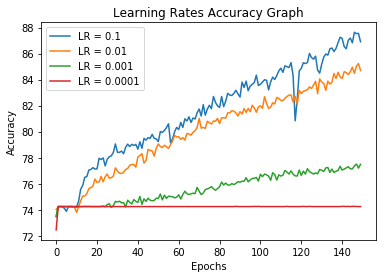

In [42]:
epochs = range(150) 
plt.plot(epochs, acclr1, label="LR = 0.1")
plt.plot(epochs, acclr2, label="LR = 0.01")
plt.plot(epochs, acclr3, label="LR = 0.001")
plt.plot(epochs, acclr4, label="LR = 0.0001")
plt.title('Learning Rates Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

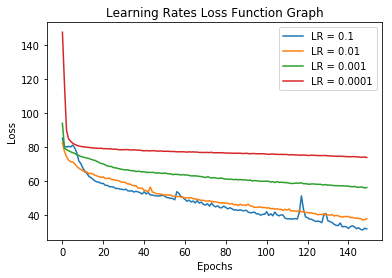

In [43]:
plt.plot(epochs, losslr1, label="LR = 0.1")
plt.plot(epochs, losslr2, label="LR = 0.01")
plt.plot(epochs, losslr3, label="LR = 0.001")
plt.plot(epochs, losslr4, label="LR = 0.0001")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Rates Loss Function Graph")
plt.legend()
plt.show()

## Different Number of Epochs

<ol> 
    <li> 20 Epochs </li>
    <li> 40 Epochs </li>
    <li> 60 Epochs </li>
    <li> 80 Epochs </li>
    <li> 100 Epochs </li>
</ol>

In [44]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))


In [45]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.01), metrics= ['accuracy'])
history1 = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=20, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))
cnn_model.save('epochs20.h5')

Epoch 1/20
204/204 [==============================] - 61s 301ms/step - loss: 0.8177 - acc: 0.7391 - val_loss: 1.0804 - val_acc: 0.7503
Epoch 2/20
204/204 [==============================] - 62s 302ms/step - loss: 0.7600 - acc: 0.7425 - val_loss: 1.0171 - val_acc: 0.7503
Epoch 3/20
204/204 [==============================] - 62s 304ms/step - loss: 0.7354 - acc: 0.7424 - val_loss: 0.8845 - val_acc: 0.7503
Epoch 4/20
204/204 [==============================] - 62s 304ms/step - loss: 0.7217 - acc: 0.7424 - val_loss: 0.7814 - val_acc: 0.7503
Epoch 5/20
204/204 [==============================] - 62s 302ms/step - loss: 0.7077 - acc: 0.7425 - val_loss: 0.9110 - val_acc: 0.7476
Epoch 6/20
204/204 [==============================] - 62s 304ms/step - loss: 0.6992 - acc: 0.7423 - val_loss: 0.7824 - val_acc: 0.7503
Epoch 7/20
204/204 [==============================] - 62s 304ms/step - loss: 0.6923 - acc: 0.7426 - val_loss: 0.7507 - val_acc: 0.7503
Epoch 8/20
204/204 [==============================] - 6

In [46]:
with open("epochs20.pkl", "wb") as file:
    data = {
        "history": history1.history
    }
    pickle.dump(data, file)

In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [10]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.01), metrics= ['accuracy'])
history2 = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=40, shuffle=True, validation_data=(X_valid_norm, y_valid_cat)
                                                   )
cnn_model.save("epochs40.h5")

Epoch 1/40
204/204 [==============================] - 65s 317ms/step - loss: 0.8234 - acc: 0.7418 - val_loss: 1.0269 - val_acc: 0.7503
Epoch 2/40
204/204 [==============================] - 60s 295ms/step - loss: 0.7608 - acc: 0.7424 - val_loss: 0.9898 - val_acc: 0.7503
Epoch 3/40
204/204 [==============================] - 61s 299ms/step - loss: 0.7279 - acc: 0.7424 - val_loss: 0.8178 - val_acc: 0.7503
Epoch 4/40
204/204 [==============================] - 57s 280ms/step - loss: 0.7153 - acc: 0.7424 - val_loss: 0.8581 - val_acc: 0.7503
Epoch 5/40
204/204 [==============================] - 61s 298ms/step - loss: 0.7102 - acc: 0.7422 - val_loss: 0.8985 - val_acc: 0.7503
Epoch 6/40
204/204 [==============================] - 55s 268ms/step - loss: 0.7021 - acc: 0.7420 - val_loss: 0.8670 - val_acc: 0.7503
Epoch 7/40
204/204 [==============================] - 60s 294ms/step - loss: 0.6861 - acc: 0.7422 - val_loss: 0.7822 - val_acc: 0.7490
Epoch 8/40
204/204 [==============================] - 6

In [11]:
with open("epochs40.pkl", "wb") as file:
    data = {
        "history": history2.history
    }
    pickle.dump(data, file)

In [12]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [13]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.01), metrics= ['accuracy'])
history3 = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=60, shuffle=True, validation_data=(X_valid_norm, y_valid_cat)
                                                   )
cnn_model.save("epochs60.h5")

Epoch 1/60
204/204 [==============================] - 63s 307ms/step - loss: 0.8306 - acc: 0.7383 - val_loss: 0.9139 - val_acc: 0.7503
Epoch 2/60
204/204 [==============================] - 61s 298ms/step - loss: 0.7662 - acc: 0.7424 - val_loss: 0.9390 - val_acc: 0.7503
Epoch 3/60
204/204 [==============================] - 55s 269ms/step - loss: 0.7398 - acc: 0.7424 - val_loss: 0.8665 - val_acc: 0.7503
Epoch 4/60
204/204 [==============================] - 61s 297ms/step - loss: 0.7150 - acc: 0.7425 - val_loss: 0.8745 - val_acc: 0.7503
Epoch 5/60
204/204 [==============================] - 61s 298ms/step - loss: 0.7094 - acc: 0.7423 - val_loss: 0.8497 - val_acc: 0.7503
Epoch 6/60
204/204 [==============================] - 55s 271ms/step - loss: 0.6994 - acc: 0.7424 - val_loss: 0.8939 - val_acc: 0.7503
Epoch 7/60
204/204 [==============================] - 61s 297ms/step - loss: 0.6957 - acc: 0.7421 - val_loss: 0.7549 - val_acc: 0.7503
Epoch 8/60
204/204 [==============================] - 6

In [14]:
with open("epochs60.pkl", "wb") as file:
    data = {
        "history": history3.history
    }
    pickle.dump(data, file)

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

In [16]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.01), metrics= ['accuracy'])
history4 = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32),
                                                    epochs=80, shuffle=True, validation_data=(X_valid_norm, y_valid_cat)
                                                   )
cnn_model.save("epochs80.h5")

Epoch 1/80
204/204 [==============================] - 63s 307ms/step - loss: 0.8385 - acc: 0.7364 - val_loss: 0.9238 - val_acc: 0.7503
Epoch 2/80
204/204 [==============================] - 61s 298ms/step - loss: 0.7690 - acc: 0.7425 - val_loss: 0.8464 - val_acc: 0.7503
Epoch 3/80
204/204 [==============================] - 61s 299ms/step - loss: 0.7369 - acc: 0.7424 - val_loss: 0.9256 - val_acc: 0.7503
Epoch 4/80
204/204 [==============================] - 61s 298ms/step - loss: 0.7157 - acc: 0.7425 - val_loss: 0.8543 - val_acc: 0.7503
Epoch 5/80
204/204 [==============================] - 55s 270ms/step - loss: 0.7082 - acc: 0.7425 - val_loss: 0.8276 - val_acc: 0.7503
Epoch 6/80
204/204 [==============================] - 61s 298ms/step - loss: 0.7028 - acc: 0.7424 - val_loss: 0.8084 - val_acc: 0.7476
Epoch 7/80
204/204 [==============================] - 61s 298ms/step - loss: 0.6942 - acc: 0.7426 - val_loss: 0.9085 - val_acc: 0.7462
Epoch 8/80
204/204 [==============================] - 6

In [17]:
with open("epochs80.pkl", "wb") as file:
    data = {
        "history": history4.history
    }
    pickle.dump(data, file)

In [18]:
sendEmail('sareenv@uni.coventry.ac.uk', 'etests')

## Model Evaluation

In [19]:
epoch20_model = load_model('epochs20.h5')
result_20 = epoch20_model.evaluate(X_train_norm, y_train_cat)
print("20 Epochs Model Accuracy is {} %".format(result_20[1] *100))

epoch40_model = load_model('epochs40.h5')
result_40 = epoch40_model.evaluate(X_train_norm, y_train_cat)
print("40 Epochs Model Accuracy is {} %".format(result_40[1] *100))

epoch60_model = load_model('epochs60.h5')
result_60 = epoch60_model.evaluate(X_train_norm, y_train_cat)
print("60 Epochs Model Accuracy is {} %".format(result_60[1] *100))

epoch80_model = load_model('epochs80.h5')
result_80 = epoch80_model.evaluate(X_train_norm, y_train_cat)
print("80 Epochs Model Accuracy is {} %".format(result_80[1] *100))

6522/6522 [==============================] - 12s 2ms/step
20 Epochs Model Accuracy is 73.65838699419781 %
6522/6522 [==============================] - 12s 2ms/step
40 Epochs Model Accuracy is 76.970254517669 %
6522/6522 [==============================] - 12s 2ms/step
60 Epochs Model Accuracy is 79.46948788166777 %
6522/6522 [==============================] - 12s 2ms/step
80 Epochs Model Accuracy is 78.68751916224443 %


# Plotting Results

In [3]:
e1 = None 
e2 = None 
e3 = None 
e4 = None 
e5 = None 

with open("./epochs20.pkl", "rb") as file:
    e1 = pickle.load(file)['history']
    
with open("./epochs40.pkl", "rb") as file:
    e2 = pickle.load(file)['history']

with open("./epochs60.pkl", "rb") as file:
    e3 = pickle.load(file)['history']

with open("./epochs80.pkl", "rb") as file:
    e4 = pickle.load(file)['history']


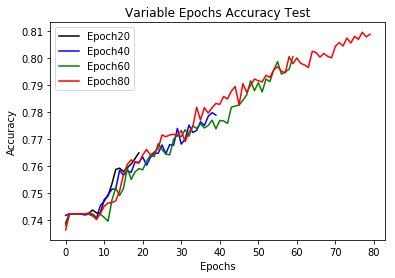

In [11]:
plt.plot(range(20), e1['acc'], 'k-', label="Epoch20")
plt.plot(range(40), e2['acc'], 'b-', label="Epoch40")
plt.plot(range(60), e3['acc'], 'g-', label="Epoch60")
plt.plot(range(80), e4['acc'], 'r-', label="Epoch80")


plt.title('Variable Epochs Accuracy Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

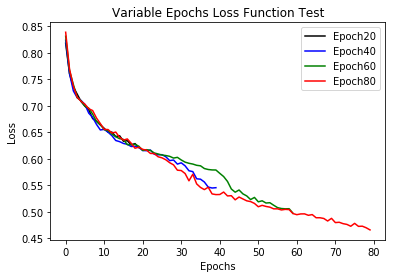

In [16]:
plt.plot(range(20), e1['loss'], 'k-', label="Epoch20")
plt.plot(range(40), e2['loss'], 'b-', label="Epoch40")
plt.plot(range(60), e3['loss'], 'g-', label="Epoch60")
plt.plot(range(80), e4['loss'], 'r-', label="Epoch80")
plt.title('Variable Epochs Loss Function Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG16 Model

The model below was trained on the google colab, because of the limited hardware GPU memory on current system with the same architecture and hyper parameters. https://colab.research.google.com/drive/1QHIHhu28sSiW0T-ZGTwg0bp-bulW30l1

In [45]:
vgg16_model = Sequential()
vgg16_model.add(Conv2D(input_shape = (224, 224, 3), activation="relu", filters= 64, kernel_size=(3, 3), padding="same"))
vgg16_model.add(Conv2D(activation="relu", filters= 64, kernel_size=(3, 3), padding="same"))
vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

vgg16_model.add(Flatten())

vgg16_model.add(Dense(units=4096,activation="relu"))
vgg16_model.add(Dense(units=4096,activation="relu"))

vgg16_model.add(Dense(units=5, activation="softmax"))
vgg16_model.compile(optimizer=SGD(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history_vgg16 = vgg16_model.fit_generator(data_generator.flow(X_training_seg_norm, y_train_cat, batch_size=32), epochs=30, shuffle=True)

Epoch 1/30


In [ ]:
with open("vgg16_model.pkl", "wb") as file:
    pickle.dump({
        'history': history_vgg16.history
    }, file)
cnn_model.save('30_hyper-parameters.h5')
sendEmail('sareenv@uni.coventry.ac.uk', 'hyper-parameter_test1')

In [ ]:
vgg16_model.save('30vgg_16.h5')

# Segmentation Model on More Convolutional Layers.

In [33]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

In [34]:
history = cnn_model.fit_generator(data_generator.flow(X_training_seg_norm, y_train_cat, batch_size=32), epochs=170, shuffle=True, validation_data=(X_valid_seg_norm, y_valid_cat))

Epoch 1/170
204/204 [==============================] - 64s 314ms/step - loss: 0.9739 - acc: 0.7299 - val_loss: 1.0491 - val_acc: 0.7503
Epoch 2/170
204/204 [==============================] - 61s 301ms/step - loss: 0.8184 - acc: 0.7423 - val_loss: 0.9952 - val_acc: 0.7503
Epoch 3/170
204/204 [==============================] - 61s 301ms/step - loss: 0.8086 - acc: 0.7424 - val_loss: 0.9900 - val_acc: 0.7503
Epoch 4/170
204/204 [==============================] - 61s 301ms/step - loss: 0.8011 - acc: 0.7425 - val_loss: 0.9756 - val_acc: 0.7503
Epoch 5/170
204/204 [==============================] - 62s 302ms/step - loss: 0.7959 - acc: 0.7426 - val_loss: 0.9752 - val_acc: 0.7503
Epoch 6/170
204/204 [==============================] - 58s 285ms/step - loss: 0.7895 - acc: 0.7424 - val_loss: 0.9901 - val_acc: 0.7503
Epoch 7/170
204/204 [==============================] - 62s 302ms/step - loss: 0.7887 - acc: 0.7426 - val_loss: 0.9832 - val_acc: 0.7503
Epoch 8/170
204/204 [===========================

Epoch 61/170
204/204 [==============================] - 62s 302ms/step - loss: 0.7017 - acc: 0.7460 - val_loss: 0.7905 - val_acc: 0.7545
Epoch 62/170
204/204 [==============================] - 61s 301ms/step - loss: 0.6986 - acc: 0.7477 - val_loss: 0.7717 - val_acc: 0.7531
Epoch 63/170
204/204 [==============================] - 61s 301ms/step - loss: 0.7013 - acc: 0.7467 - val_loss: 0.7686 - val_acc: 0.7531
Epoch 64/170
204/204 [==============================] - 61s 301ms/step - loss: 0.6966 - acc: 0.7465 - val_loss: 0.7868 - val_acc: 0.7545
Epoch 65/170
204/204 [==============================] - 62s 302ms/step - loss: 0.6958 - acc: 0.7496 - val_loss: 0.7692 - val_acc: 0.7559
Epoch 66/170
204/204 [==============================] - 61s 301ms/step - loss: 0.6952 - acc: 0.7508 - val_loss: 0.7543 - val_acc: 0.7572
Epoch 67/170
204/204 [==============================] - 57s 278ms/step - loss: 0.6939 - acc: 0.7500 - val_loss: 0.7727 - val_acc: 0.7572
Epoch 68/170
204/204 [===================

In [35]:
with open('seg_model2_170epochs.pkl', 'wb') as file:
    data = {'history': history.history}
    pickle.dump(data, file)
cnn_model.save('cnn_model_seg_170.h5')
cnn_model.save_weights('cnn_model_seg_170_weights.h5')

# Transfer Learning

In [36]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = (224, 224, 3)))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())

# Now this needs to be passed to the fully connected artifical neural networks.

cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 1024, activation = 'relu')) 
cnn_model.add(Dense(units = 5, activation= 'softmax' ))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.SGD(lr = 0.001), metrics= ['accuracy'])

Need to make changes here and get the weights of latest model.

In [37]:
cnn_model.load_weights('cnn_model_seg_170_weights.h5')
print("Weights loaded")

Weights loaded


In [38]:
history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32), epochs=300, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

Epoch 1/300
204/204 [==============================] - 60s 296ms/step - loss: 0.7573 - acc: 0.7428 - val_loss: 0.8129 - val_acc: 0.7517
Epoch 2/300
204/204 [==============================] - 61s 299ms/step - loss: 0.7095 - acc: 0.7423 - val_loss: 0.8441 - val_acc: 0.7517
Epoch 3/300
204/204 [==============================] - 61s 301ms/step - loss: 0.6983 - acc: 0.7446 - val_loss: 0.8520 - val_acc: 0.7517
Epoch 4/300
204/204 [==============================] - 62s 302ms/step - loss: 0.6872 - acc: 0.7420 - val_loss: 0.9011 - val_acc: 0.7517
Epoch 5/300
204/204 [==============================] - 62s 302ms/step - loss: 0.6789 - acc: 0.7466 - val_loss: 0.7438 - val_acc: 0.7503
Epoch 6/300
204/204 [==============================] - 61s 300ms/step - loss: 0.6763 - acc: 0.7452 - val_loss: 0.7690 - val_acc: 0.7517
Epoch 7/300
204/204 [==============================] - 59s 288ms/step - loss: 0.6663 - acc: 0.7493 - val_loss: 0.7513 - val_acc: 0.7545
Epoch 8/300
204/204 [===========================

Epoch 61/300
204/204 [==============================] - 62s 305ms/step - loss: 0.5666 - acc: 0.7728 - val_loss: 0.6219 - val_acc: 0.7517
Epoch 62/300
204/204 [==============================] - 62s 304ms/step - loss: 0.5666 - acc: 0.7730 - val_loss: 0.6002 - val_acc: 0.7628
Epoch 63/300
204/204 [==============================] - 62s 303ms/step - loss: 0.5618 - acc: 0.7756 - val_loss: 0.6233 - val_acc: 0.7559
Epoch 64/300
204/204 [==============================] - 62s 302ms/step - loss: 0.5637 - acc: 0.7715 - val_loss: 0.6049 - val_acc: 0.7628
Epoch 65/300
204/204 [==============================] - 62s 303ms/step - loss: 0.5626 - acc: 0.7717 - val_loss: 0.5961 - val_acc: 0.7738
Epoch 66/300
204/204 [==============================] - 62s 305ms/step - loss: 0.5627 - acc: 0.7725 - val_loss: 0.6119 - val_acc: 0.7628
Epoch 67/300
204/204 [==============================] - 62s 304ms/step - loss: 0.5574 - acc: 0.7763 - val_loss: 0.6115 - val_acc: 0.7724
Epoch 68/300
204/204 [===================

204/204 [==============================] - 62s 303ms/step - loss: 0.5012 - acc: 0.7926 - val_loss: 0.5795 - val_acc: 0.7807
Epoch 180/300
204/204 [==============================] - 62s 303ms/step - loss: 0.5038 - acc: 0.7951 - val_loss: 0.5894 - val_acc: 0.7738
Epoch 181/300
204/204 [==============================] - 62s 303ms/step - loss: 0.5033 - acc: 0.7955 - val_loss: 0.5602 - val_acc: 0.7766
Epoch 182/300
204/204 [==============================] - 62s 303ms/step - loss: 0.5003 - acc: 0.7929 - val_loss: 0.5680 - val_acc: 0.7752
Epoch 183/300
204/204 [==============================] - 62s 302ms/step - loss: 0.5014 - acc: 0.7928 - val_loss: 0.5976 - val_acc: 0.7669
Epoch 184/300
204/204 [==============================] - 62s 304ms/step - loss: 0.4999 - acc: 0.7938 - val_loss: 0.5927 - val_acc: 0.7766
Epoch 185/300
204/204 [==============================] - 62s 302ms/step - loss: 0.5012 - acc: 0.7969 - val_loss: 0.5924 - val_acc: 0.7724
Epoch 186/300
204/204 [=========================

204/204 [==============================] - 62s 302ms/step - loss: 0.4668 - acc: 0.8080 - val_loss: 0.5483 - val_acc: 0.7779
Epoch 298/300
204/204 [==============================] - 62s 303ms/step - loss: 0.4647 - acc: 0.8072 - val_loss: 0.5734 - val_acc: 0.7779
Epoch 299/300
204/204 [==============================] - 61s 301ms/step - loss: 0.4581 - acc: 0.8135 - val_loss: 0.5434 - val_acc: 0.7876
Epoch 300/300
204/204 [==============================] - 62s 303ms/step - loss: 0.4658 - acc: 0.8082 - val_loss: 0.5710 - val_acc: 0.7876


In [39]:
with open("trans.pkl", "wb") as file:
    data = {
        'history': history.history
    }
    pickle.dump(data, file)
cnn_model.save('transfer_learning.h5')

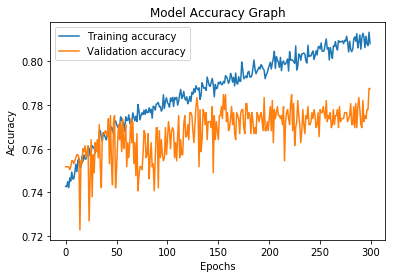

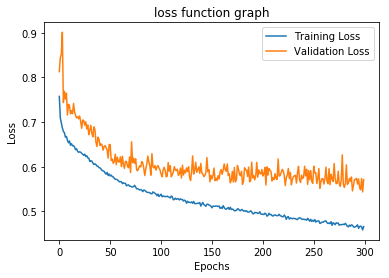

In [40]:
his = history.history
acc = his['acc']
val_acc = his['val_acc']
val_loss = his['val_loss']
plt.plot(range(300), acc, label="Training accuracy")
plt.plot(range(300), val_acc, label="Validation accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.title("Model Accuracy Graph")
plt.ylabel('Accuracy')
plt.show()


plt.plot(range(300), his['loss'], label = "Training Loss")
plt.plot(range(300), his['val_loss'], label="Validation Loss")
plt.title('loss function graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
res = cnn_model.evaluate(X_test_norm, y_test_cat)
print(res[1] * 100)

1812/1812 [==============================] - 5s 3ms/step
79.02869754542841


In [42]:
sendEmail('sareenv@uni.coventry.ac.uk', 'transfer learning model')

# LENET Model Architecture.

<li> 32 * 32 pxls for Lenet Architecture. </li>
<p> The code below imports training, testing and validation datasets in pickle encoded files which contains the 32 * 32 pixel images. </p>

In [24]:
trainingData = None
with open("./train32.pkl", "rb") as file:
  trainingData = pickle.load(file)

testingData = None
with open("./test32.pkl", "rb") as file:
  testingData = pickle.load(file)

validationData = None 
with open("./val32.pkl", "rb") as file:
    validationData = pickle.load(file)

In [25]:
X_train = trainingData["imagesData"]
y_train = trainingData["labels"]
X_test = testingData["imagesData"]
y_test = testingData["imageLabels"]
X_valid = validationData["imagesData"]
y_valid = validationData["labels"]

X_valid = np.array(X_valid)

print("Training images shape is {}".format(X_train.shape))
print("Training labels shape is {}".format(y_train.shape))
print("Testing images shape is {}".format(X_test.shape))
print("Training labels shape is {}".format(y_test.shape))
print("Validation images shape is {}".format(X_valid.shape))
print("Validation labels shape is {}".format(y_valid.shape))

Training images shape is (6522, 32, 32, 3)
Training labels shape is (6522,)
Testing images shape is (1812, 32, 32, 3)
Training labels shape is (1812,)
Validation images shape is (725, 32, 32, 3)
Validation labels shape is (725,)


In [26]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_valid = X_valid.astype("float32")

X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_valid_norm = X_valid / 255

In [27]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat =  keras.utils.to_categorical(y_test)
y_valid_cat = keras.utils.to_categorical(y_valid)

In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax')) #output should be categorial in nature.

In [29]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.01), metrics=['accuracy'])

In [30]:
history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32), epochs=300, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

Epoch 1/300
204/204 [==============================] - 4s 18ms/step - loss: 0.7921 - acc: 0.7398 - val_loss: 0.7503 - val_acc: 0.7462
Epoch 2/300
204/204 [==============================] - 2s 12ms/step - loss: 0.7330 - acc: 0.7430 - val_loss: 0.7277 - val_acc: 0.7462
Epoch 3/300
204/204 [==============================] - 3s 16ms/step - loss: 0.7118 - acc: 0.7427 - val_loss: 0.6968 - val_acc: 0.7462
Epoch 4/300
204/204 [==============================] - 2s 12ms/step - loss: 0.6925 - acc: 0.7427 - val_loss: 0.7135 - val_acc: 0.7434
Epoch 5/300
204/204 [==============================] - 3s 12ms/step - loss: 0.6793 - acc: 0.7458 - val_loss: 0.7152 - val_acc: 0.7421
Epoch 6/300
204/204 [==============================] - 3s 13ms/step - loss: 0.6731 - acc: 0.7478 - val_loss: 0.6827 - val_acc: 0.7476
Epoch 7/300
204/204 [==============================] - 3s 13ms/step - loss: 0.6639 - acc: 0.7488 - val_loss: 0.6647 - val_acc: 0.7545
Epoch 8/300
204/204 [==============================] - 3s 16ms

Epoch 62/300
204/204 [==============================] - 3s 13ms/step - loss: 0.5254 - acc: 0.7910 - val_loss: 0.5511 - val_acc: 0.7821
Epoch 63/300
204/204 [==============================] - 3s 15ms/step - loss: 0.5245 - acc: 0.7925 - val_loss: 0.5454 - val_acc: 0.7890
Epoch 64/300
204/204 [==============================] - 3s 13ms/step - loss: 0.5194 - acc: 0.7918 - val_loss: 0.5677 - val_acc: 0.7821
Epoch 65/300
204/204 [==============================] - 2s 12ms/step - loss: 0.5233 - acc: 0.7916 - val_loss: 0.5864 - val_acc: 0.7779
Epoch 66/300
204/204 [==============================] - 3s 13ms/step - loss: 0.5237 - acc: 0.7910 - val_loss: 0.5422 - val_acc: 0.7807
Epoch 67/300
204/204 [==============================] - 3s 13ms/step - loss: 0.5221 - acc: 0.7887 - val_loss: 0.5589 - val_acc: 0.7766
Epoch 68/300
204/204 [==============================] - 3s 16ms/step - loss: 0.5182 - acc: 0.7925 - val_loss: 0.5434 - val_acc: 0.7779
Epoch 69/300
204/204 [==============================] -

204/204 [==============================] - 3s 13ms/step - loss: 0.4321 - acc: 0.8273 - val_loss: 0.5144 - val_acc: 0.8000
Epoch 183/300
204/204 [==============================] - 3s 17ms/step - loss: 0.4362 - acc: 0.8245 - val_loss: 0.5188 - val_acc: 0.7903
Epoch 184/300
204/204 [==============================] - 3s 13ms/step - loss: 0.4329 - acc: 0.8222 - val_loss: 0.5065 - val_acc: 0.7931
Epoch 185/300
204/204 [==============================] - 2s 12ms/step - loss: 0.4287 - acc: 0.8305 - val_loss: 0.5238 - val_acc: 0.7821
Epoch 186/300
204/204 [==============================] - 3s 12ms/step - loss: 0.4328 - acc: 0.8263 - val_loss: 0.5351 - val_acc: 0.7986
Epoch 187/300
204/204 [==============================] - 3s 13ms/step - loss: 0.4345 - acc: 0.8242 - val_loss: 0.5113 - val_acc: 0.8097
Epoch 188/300
204/204 [==============================] - 3s 17ms/step - loss: 0.4225 - acc: 0.8299 - val_loss: 0.5175 - val_acc: 0.7945
Epoch 189/300
204/204 [==============================] - 2s 12

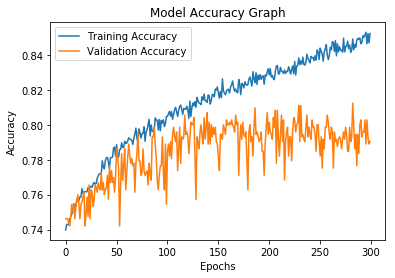

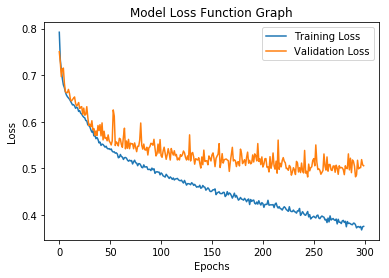

In [31]:
plt.plot(range(300), history.history['acc'], label="Training Accuracy")
plt.plot(range(300), history.history['val_acc'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Graph')
plt.legend()
plt.show()


plt.plot(range(300), history.history['loss'], label="Training Loss")
plt.plot(range(300), history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Function Graph')
plt.legend()
plt.show()

In [32]:
evaluation = cnn_model.evaluate(X_test_norm, y_test_cat, batch_size=32)
evaluation[1]

1812/1812 [==============================] - 0s 46us/step


0.8035320085668669

In [65]:
with open("lenet_hist.pkl", "wb") as file:
    data = {
        'history': history.history
    }
    pickle.dump(data, file)
cnn_model.save('lenet_modi.h5')

# Original Purposed Hyper-parmaters

In [58]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax')) #output should be categorial in nature.

In [59]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.0001), metrics=['accuracy'])

In [46]:
history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32), epochs=300, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

Epoch 1/300
204/204 [==============================] - 3s 17ms/step - loss: 0.7639 - acc: 0.7368 - val_loss: 0.7103 - val_acc: 0.7462
Epoch 2/300
204/204 [==============================] - 2s 10ms/step - loss: 0.6971 - acc: 0.7420 - val_loss: 0.6963 - val_acc: 0.7462
Epoch 3/300
204/204 [==============================] - 2s 11ms/step - loss: 0.6812 - acc: 0.7419 - val_loss: 0.6840 - val_acc: 0.7462
Epoch 4/300
204/204 [==============================] - 2s 11ms/step - loss: 0.6732 - acc: 0.7450 - val_loss: 0.6774 - val_acc: 0.7448
Epoch 5/300
204/204 [==============================] - 2s 11ms/step - loss: 0.6670 - acc: 0.7474 - val_loss: 0.6675 - val_acc: 0.7448
Epoch 6/300
204/204 [==============================] - 3s 13ms/step - loss: 0.6614 - acc: 0.7461 - val_loss: 0.6827 - val_acc: 0.7448
Epoch 7/300
204/204 [==============================] - 2s 10ms/step - loss: 0.6561 - acc: 0.7491 - val_loss: 0.6703 - val_acc: 0.7462
Epoch 8/300
204/204 [==============================] - 2s 11ms

Epoch 62/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5116 - acc: 0.7973 - val_loss: 0.5619 - val_acc: 0.7752
Epoch 63/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5142 - acc: 0.7941 - val_loss: 0.5635 - val_acc: 0.7752
Epoch 64/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5116 - acc: 0.7966 - val_loss: 0.5417 - val_acc: 0.7724
Epoch 65/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5142 - acc: 0.7956 - val_loss: 0.5440 - val_acc: 0.7793
Epoch 66/300
204/204 [==============================] - 3s 14ms/step - loss: 0.5084 - acc: 0.7957 - val_loss: 0.5450 - val_acc: 0.7752
Epoch 67/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5119 - acc: 0.7959 - val_loss: 0.5433 - val_acc: 0.7834
Epoch 68/300
204/204 [==============================] - 2s 11ms/step - loss: 0.5116 - acc: 0.8018 - val_loss: 0.5688 - val_acc: 0.7641
Epoch 69/300
204/204 [==============================] -

204/204 [==============================] - 2s 11ms/step - loss: 0.4335 - acc: 0.8259 - val_loss: 0.5013 - val_acc: 0.7959
Epoch 183/300
204/204 [==============================] - 2s 11ms/step - loss: 0.4350 - acc: 0.8257 - val_loss: 0.5148 - val_acc: 0.7972
Epoch 184/300
204/204 [==============================] - 2s 11ms/step - loss: 0.4328 - acc: 0.8271 - val_loss: 0.5185 - val_acc: 0.7834
Epoch 185/300
204/204 [==============================] - 2s 11ms/step - loss: 0.4388 - acc: 0.8229 - val_loss: 0.5268 - val_acc: 0.7959
Epoch 186/300
204/204 [==============================] - 3s 13ms/step - loss: 0.4347 - acc: 0.8275 - val_loss: 0.5095 - val_acc: 0.7986
Epoch 187/300
204/204 [==============================] - 2s 11ms/step - loss: 0.4320 - acc: 0.8266 - val_loss: 0.5045 - val_acc: 0.8028
Epoch 188/300
204/204 [==============================] - 2s 11ms/step - loss: 0.4273 - acc: 0.8282 - val_loss: 0.5036 - val_acc: 0.8028
Epoch 189/300
204/204 [==============================] - 2s 11

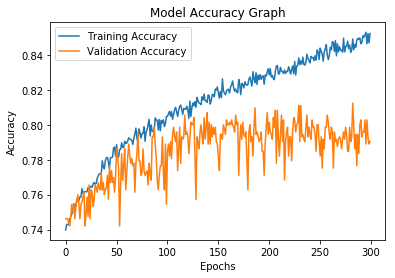

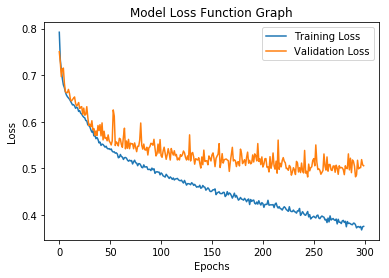

In [38]:
plt.plot(range(300), history.history['acc'], '-' ,label="Training Accuracy")
plt.plot(range(300), history.history['val_acc'], '-' , label="Validation Accuracy")
plt.title('Model Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(range(300), history.history['loss'], label="Training Loss")
plt.plot(range(300), history.history['val_loss'], label="Validation Loss")
plt.title('Model Loss Function Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
evaluation = cnn_model.evaluate(X_test_norm, y_test_cat, batch_size=32)
print(evaluation[1])

1812/1812 [==============================] - 0s 46us/step
0.8134657836644592


In [57]:
with open("lenetorig_hist.pkl", "wb") as file:
    data = {
        'history': history.history
    }
    pickle.dump(data, file)
cnn_model.save('lenet_orignal.h5')

In [66]:
cnn_model = load_model('lenet_orignal.h5')
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               141240    
_________________________________________________________________
dense_19 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 425       
Total params: 152,285
Trainable params: 152,285
Non-trainable params: 0
_________________________________________________________________


# Transfer Learning: Segmented data & orignal LENET Architecture.

In [95]:
segmentedData32 = None 
with open('./segmentation_32.pkl', 'rb') as file:
    segmentedData32 = pickle.load(file)

In [96]:
X_train_seg32 = segmentedData32['X_train']
X_test_seg32 = segmentedData32['X_test']
X_val_seg32 = segmentedData32['X_valid']

In [97]:
X_train_seg32_norm = X_train_seg32 / 255 
X_test_seg32_norm = X_test_seg32 / 255
X_val_seg32_norm = X_val_seg32 / 255

In [98]:
X_val_seg32_norm.shape

(725, 32, 32, 3)

In [99]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax')) #output should be categorial in nature.

In [100]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.0001), metrics=['accuracy'])

In [101]:
history = cnn_model.fit_generator(data_generator.flow(X_train_seg32_norm, y_train_cat, batch_size=32), epochs=50, shuffle=True, validation_data=(X_val_seg32_norm, y_valid_cat))

Epoch 1/50
204/204 [==============================] - 4s 18ms/step - loss: 0.8178 - acc: 0.7358 - val_loss: 0.7736 - val_acc: 0.7434
Epoch 2/50
204/204 [==============================] - 2s 12ms/step - loss: 0.7548 - acc: 0.7428 - val_loss: 0.7634 - val_acc: 0.7379
Epoch 3/50
204/204 [==============================] - 3s 15ms/step - loss: 0.7460 - acc: 0.7437 - val_loss: 0.7444 - val_acc: 0.7448
Epoch 4/50
204/204 [==============================] - 3s 17ms/step - loss: 0.7373 - acc: 0.7452 - val_loss: 0.7429 - val_acc: 0.7448
Epoch 5/50
204/204 [==============================] - 4s 18ms/step - loss: 0.7312 - acc: 0.7437 - val_loss: 0.7327 - val_acc: 0.7448
Epoch 6/50
204/204 [==============================] - 4s 20ms/step - loss: 0.7238 - acc: 0.7448 - val_loss: 0.7276 - val_acc: 0.7462
Epoch 7/50
204/204 [==============================] - 3s 17ms/step - loss: 0.7167 - acc: 0.7459 - val_loss: 0.7321 - val_acc: 0.7421
Epoch 8/50
204/204 [==============================] - 3s 16ms/step - 

In [102]:
cnn_model.save_weights('segmented_lenetTrain.h5')

In [103]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax')) #output should be categorial in nature.
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.0001), metrics=['accuracy'])

In [105]:
cnn_model.load_weights('segmented_lenetTrain.h5')

In [106]:
history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32), epochs=50, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

Epoch 1/50
204/204 [==============================] - 4s 20ms/step - loss: 0.6981 - acc: 0.7387 - val_loss: 0.6700 - val_acc: 0.7407
Epoch 2/50
204/204 [==============================] - 3s 13ms/step - loss: 0.6547 - acc: 0.7478 - val_loss: 0.6625 - val_acc: 0.7434
Epoch 3/50
204/204 [==============================] - 2s 12ms/step - loss: 0.6406 - acc: 0.7511 - val_loss: 0.6424 - val_acc: 0.7669
Epoch 4/50
204/204 [==============================] - 3s 12ms/step - loss: 0.6370 - acc: 0.7572 - val_loss: 0.6336 - val_acc: 0.7614
Epoch 5/50
204/204 [==============================] - 3s 12ms/step - loss: 0.6334 - acc: 0.7558 - val_loss: 0.6325 - val_acc: 0.7655
Epoch 6/50
204/204 [==============================] - 3s 13ms/step - loss: 0.6262 - acc: 0.7601 - val_loss: 0.6269 - val_acc: 0.7669
Epoch 7/50
204/204 [==============================] - 3s 15ms/step - loss: 0.6208 - acc: 0.7628 - val_loss: 0.6340 - val_acc: 0.7669
Epoch 8/50
204/204 [==============================] - 2s 12ms/step - 

In [107]:
evaluation = cnn_model.evaluate(X_test_norm, y_test_cat)
print(evaluation[1])

1812/1812 [==============================] - 0s 69us/step
0.8107064016344269


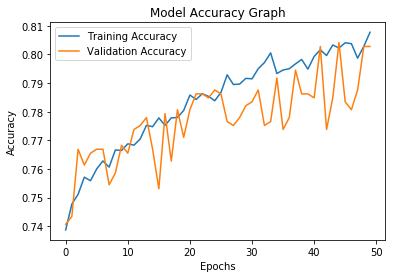

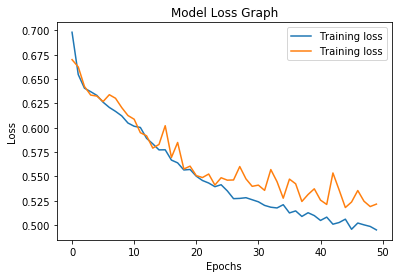

In [116]:
plt.plot(range(50), history.history['acc'], label="Training Accuracy")
plt.plot(range(50), history.history['val_acc'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Graph')
plt.legend()
plt.show()

plt.plot(range(50), history.history['loss'], label="Training loss")
plt.plot(range(50), history.history['val_loss'], label="Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Graph')
plt.legend()
plt.show()

In [39]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 6, kernel_size=(5, 5), activation = 'relu', input_shape=(32, 32, 3)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax')) #output should be categorial in nature.
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.0001), metrics=['accuracy'])

In [40]:
cnn_model.load_weights('segmented_lenetTrain.h5')

In [41]:
history = cnn_model.fit_generator(data_generator.flow(X_train_norm, y_train_cat, batch_size=32), epochs=300, shuffle=True, validation_data=(X_valid_norm, y_valid_cat))

Epoch 1/300
204/204 [==============================] - 4s 19ms/step - loss: 0.6917 - acc: 0.7409 - val_loss: 0.6682 - val_acc: 0.7407
Epoch 2/300
204/204 [==============================] - 2s 12ms/step - loss: 0.6540 - acc: 0.7473 - val_loss: 0.6597 - val_acc: 0.7434
Epoch 3/300
204/204 [==============================] - 3s 15ms/step - loss: 0.6424 - acc: 0.7536 - val_loss: 0.6406 - val_acc: 0.7559
Epoch 4/300
204/204 [==============================] - 3s 12ms/step - loss: 0.6336 - acc: 0.7549 - val_loss: 0.6425 - val_acc: 0.7559
Epoch 5/300
204/204 [==============================] - 3s 12ms/step - loss: 0.6302 - acc: 0.7566 - val_loss: 0.6372 - val_acc: 0.7600
Epoch 6/300
204/204 [==============================] - 3s 13ms/step - loss: 0.6225 - acc: 0.7614 - val_loss: 0.6313 - val_acc: 0.7614
Epoch 7/300
204/204 [==============================] - 3s 14ms/step - loss: 0.6185 - acc: 0.7664 - val_loss: 0.6257 - val_acc: 0.7655
Epoch 8/300
204/204 [==============================] - 3s 15ms

Epoch 62/300
204/204 [==============================] - 3s 14ms/step - loss: 0.4908 - acc: 0.8069 - val_loss: 0.5323 - val_acc: 0.7959
Epoch 63/300
204/204 [==============================] - 3s 16ms/step - loss: 0.4883 - acc: 0.8086 - val_loss: 0.5574 - val_acc: 0.7738
Epoch 64/300
204/204 [==============================] - 3s 13ms/step - loss: 0.4912 - acc: 0.8044 - val_loss: 0.5245 - val_acc: 0.7903
Epoch 65/300
204/204 [==============================] - 3s 13ms/step - loss: 0.4820 - acc: 0.8108 - val_loss: 0.5347 - val_acc: 0.7807
Epoch 66/300
204/204 [==============================] - 3s 12ms/step - loss: 0.4919 - acc: 0.8070 - val_loss: 0.5237 - val_acc: 0.7945
Epoch 67/300
204/204 [==============================] - 3s 14ms/step - loss: 0.4845 - acc: 0.8062 - val_loss: 0.5203 - val_acc: 0.7959
Epoch 68/300
204/204 [==============================] - 3s 16ms/step - loss: 0.4881 - acc: 0.8089 - val_loss: 0.5155 - val_acc: 0.7972
Epoch 69/300
204/204 [==============================] -

204/204 [==============================] - 3s 14ms/step - loss: 0.4200 - acc: 0.8340 - val_loss: 0.5204 - val_acc: 0.7890
Epoch 183/300
204/204 [==============================] - 3s 15ms/step - loss: 0.4209 - acc: 0.8360 - val_loss: 0.5101 - val_acc: 0.7986
Epoch 184/300
204/204 [==============================] - 3s 12ms/step - loss: 0.4275 - acc: 0.8307 - val_loss: 0.5060 - val_acc: 0.8014
Epoch 185/300
204/204 [==============================] - 2s 12ms/step - loss: 0.4187 - acc: 0.8337 - val_loss: 0.5093 - val_acc: 0.7903
Epoch 186/300
204/204 [==============================] - 2s 12ms/step - loss: 0.4251 - acc: 0.8324 - val_loss: 0.4964 - val_acc: 0.8055
Epoch 187/300
204/204 [==============================] - 3s 14ms/step - loss: 0.4192 - acc: 0.8364 - val_loss: 0.5097 - val_acc: 0.7931
Epoch 188/300
204/204 [==============================] - 3s 15ms/step - loss: 0.4266 - acc: 0.8262 - val_loss: 0.4947 - val_acc: 0.8041
Epoch 189/300
204/204 [==============================] - 2s 12

In [42]:
evaluation = cnn_model.evaluate(X_test_norm, y_test_cat)
print(evaluation[1])

1812/1812 [==============================] - 0s 57us/step
0.8156732890516454


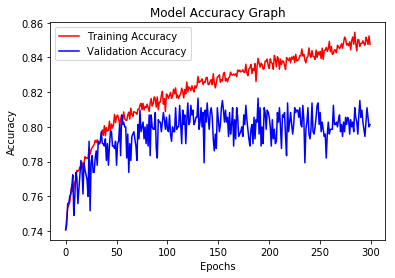

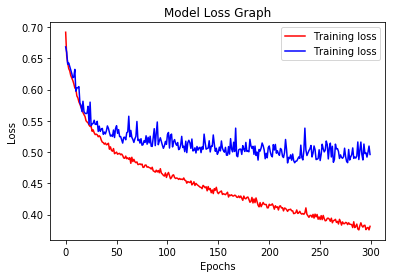

In [48]:
plt.plot(range(300), history.history['acc'], 'r-' ,label="Training Accuracy")
plt.plot(range(300), history.history['val_acc'], 'b-', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Graph')
plt.legend()
plt.show()

plt.plot(range(300), history.history['loss'], 'r-' , label="Training loss")
plt.plot(range(300), history.history['val_loss'], 'b-',label="Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Graph')
plt.legend()
plt.show()

In [44]:
cnn_model.save('lenet_transfer.h5')

# Evaluation and Confusion Matrix

[]

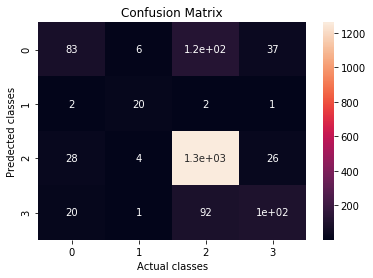

In [71]:
model = load_model('hlr2.h5')
pred = model.predict_classes(X_test_norm)
actualResults = y_test_cat.argmax(1)
cm = confusion_matrix(actualResults, pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual classes')
plt.ylabel('Predected classes')
plt.plot()

In [72]:
report = classification_report(actualResults, pred)
print(report)

              precision    recall  f1-score   support

           1       0.62      0.33      0.43       251
           2       0.65      0.80      0.71        25
           3       0.85      0.96      0.90      1319
           4       0.62      0.48      0.54       217

    accuracy                           0.81      1812
   macro avg       0.69      0.64      0.65      1812
weighted avg       0.79      0.81      0.79      1812



## Plotting Predected VS Actual Results 

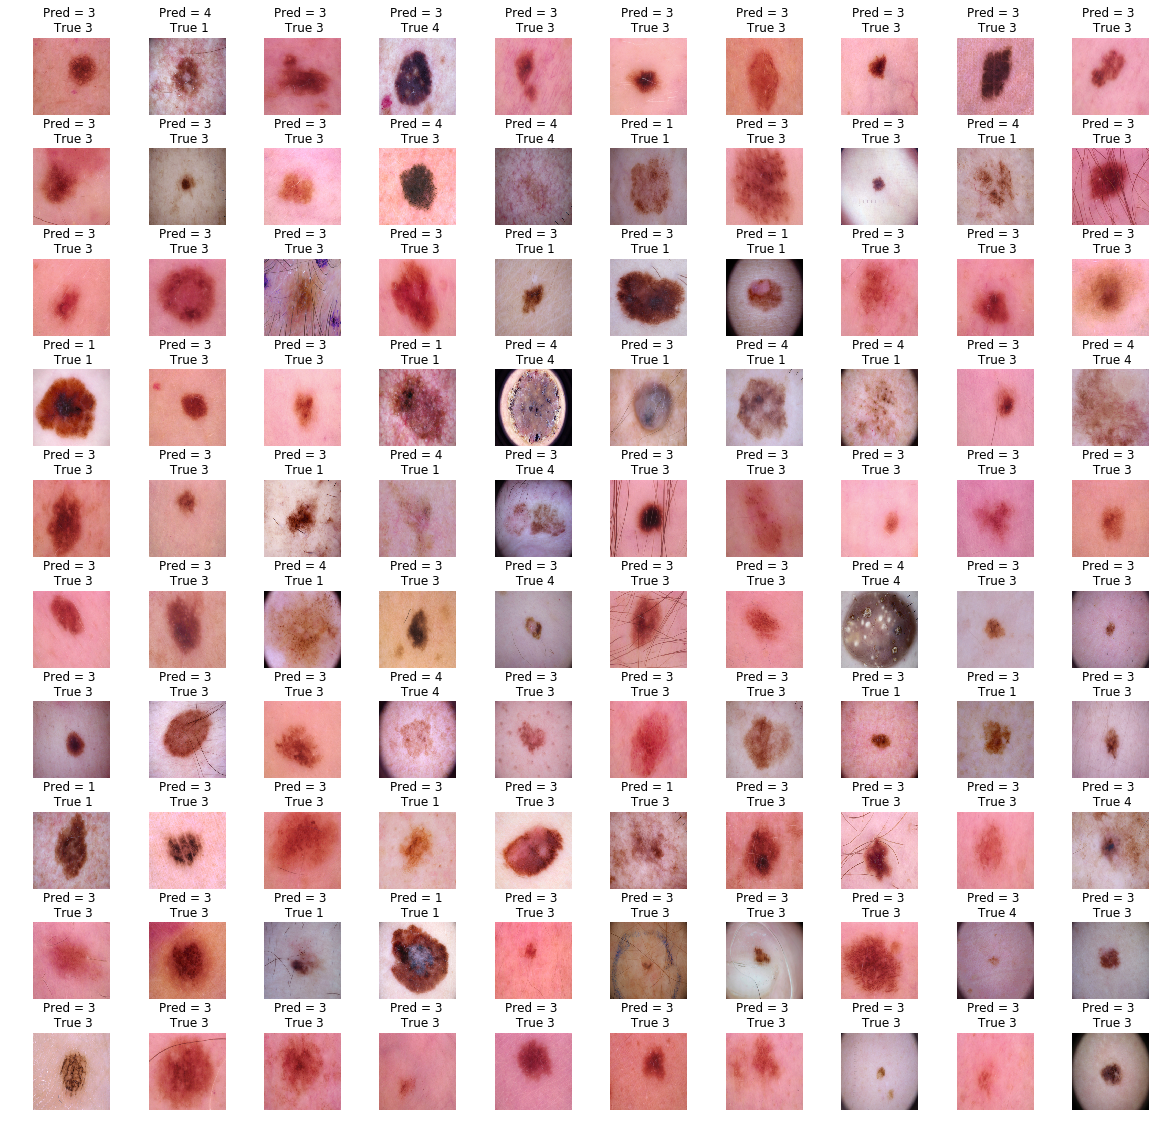

In [74]:
l = 10 
w = 10
fig, axes = plt.subplots(l, w, figsize = (20, 20))
axes = axes.ravel()
for i in np.arange(0, l * w):
  axes[i].imshow(X_test_norm[i])
  axes[i].set_title("Pred = {} \n Actual {}".format(pred[i], actualResults[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Evaluation with the sample data computed by Neural Network.

In [76]:
eval_data = None
with open('evaluation225.pkl', 'rb') as file:
    eval_data = pickle.load(file)

[]

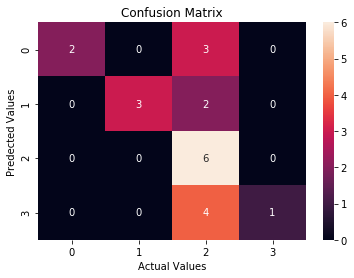

In [77]:
X_eval = np.array(eval_data['images'])
y_eval = np.array(eval_data['labels'])
X_eval = X_eval / 255
y_eval = keras.utils.to_categorical(y_eval)
pred = model.predict_classes(X_eval)
actual = y_eval.argmax(1)
cm = confusion_matrix(actual, pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predected Values')
plt.plot()

In [53]:
report = classification_report(actual, pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      0.60      0.75         5
           3       0.40      1.00      0.57         6
           4       1.00      0.20      0.33         5

    accuracy                           0.57        21
   macro avg       0.85      0.55      0.56        21
weighted avg       0.83      0.57      0.56        21



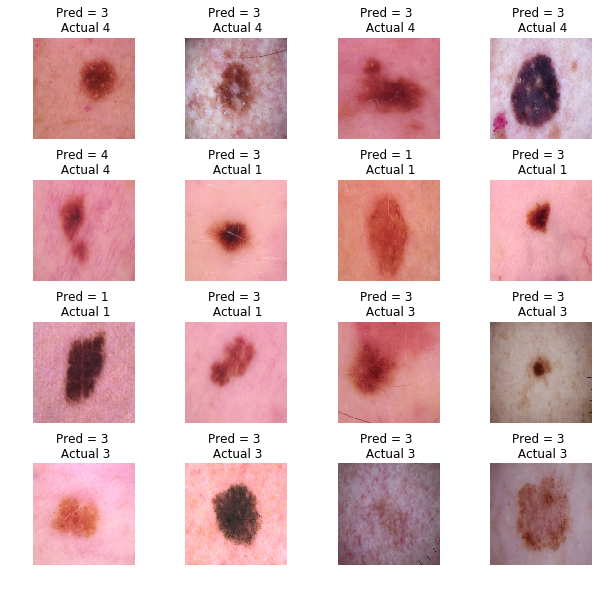

In [83]:
l = 4 
w = 4
fig, axes = plt.subplots(l, w, figsize = (10, 10))
axes = axes.ravel()
for i in np.arange(0, l * w):
  axes[i].imshow(X_test_norm[i])
  axes[i].set_title("Pred = {} \n Actual {}".format(pred[i], actual[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Evaluation with the sample data computed by Skin specialists.